# CS 4644: Final Project Visualizations

Copyright (c) 2025 Ethan Nguyen-Tu

## Part 1: Setup

##### STEP 1: Mount Google Drive and Set Device for Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_folder = "drive/MyDrive/CS4644_FinalProject"

##### STEP 2: All Imports

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import zipfile

##### STEP 3: General Helper Functions

In [ ]:
def load_history(csv):
  return pd.read_csv(''.join([project_folder, "/History", csv]))

In [ ]:
def loss_valid_comp(model_name, training_loss, training_accuracy, validation_loss, validation_accuracy, xshift=1, yshift=0.55):
  fig, axs = plt.subplots(1, 2, figsize=(12, 5))

  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Loss', color='tab:red')
  tl, = axs[0].plot(training_loss, label='Loss', color='tab:red')
  axs[0].set_title(' '.join([model_name, 'Training Curves']))

  ax0Twin = axs[0].twinx()
  ax0Twin.set_ylabel('Accuracy', color='tab:blue')
  tv, = ax0Twin.plot(training_accuracy, label='Accuracy')

  axs[0].legend([tl, tv], [tl.get_label(), tv.get_label()], bbox_to_anchor=(xshift, yshift))


  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Loss', color='tab:red')
  vl, = axs[1].plot(validation_loss, label='Loss', color='tab:red')
  axs[1].set_title(' '.join([model_name, 'Validation Curves']))

  ax1Twin = axs[1].twinx()
  ax1Twin.set_ylabel('Accuracy', color='tab:blue')
  vv, = ax1Twin.plot(validation_accuracy, label='Accuracy')

  axs[1].legend([vl, vv], [vl.get_label(), vv.get_label()], bbox_to_anchor=(xshift, yshift))

  plt.tight_layout()
  plt.show()

In [ ]:
def model_results(model_name, training_loss, training_accuracy, validation_loss, validation_accuracy):
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(training_loss, label='Training Loss')
  plt.plot(validation_loss, label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.title(' '.join([model_name, 'Loss Curves']))

  plt.subplot(1, 2, 2)
  plt.plot(training_accuracy, label='Training Accuracy')
  plt.plot(validation_accuracy, label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title(' '.join([model_name, 'Accuracy Curves']))

  plt.tight_layout()
  plt.show()

In [ ]:
def model_plots(model_name, model_history, xshift=1, yshift=0.55):
  loss_valid_comp(model_name, model_history["loss"], model_history["accuracy"], model_history["val_loss"], model_history["val_accuracy"], xshift, yshift)
  model_results(model_name, model_history["loss"], model_history["accuracy"], model_history["val_loss"], model_history["val_accuracy"])

In [ ]:
def model_comparison(model1_name, model1_loss, model1_accuracy, model2_name, model2_loss, model2_accuracy, prefix="Training"):

  loss_diff = abs(model1_loss - model2_loss)
  val_diff = abs(model1_accuracy - model2_accuracy)
  print("Loss Difference:\n", loss_diff)
  print("Max Loss Difference:", max(loss_diff))
  print("Accuracy Difference:\n", val_diff)
  print("Max Accuracy Difference:", max(val_diff))

  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(model1_loss, label=' '.join([model1_name, prefix, 'Loss']))
  plt.plot(model2_loss, label=' '.join([model2_name, prefix, 'Loss']))
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.title(' '.join([model1_name, 'vs.', model2_name, 'Loss Curves']))

  plt.subplot(1, 2, 2)
  plt.plot(model1_accuracy, label=' '.join([model1_name, prefix, 'Accuracy']))
  plt.plot(model2_accuracy, label=' '.join([model2_name, prefix, 'Accuracy']))
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title(' '.join([model1_name, 'vs.', model2_name, 'Accuracy Curves']))

  plt.tight_layout()
  plt.show()

In [ ]:
def full_model_comparison(model1_name, model1_history, model2_name, model2_history):
  model_comparison(model1_name, model1_history["loss"], model1_history["accuracy"], model2_name, model2_history["loss"], model2_history["accuracy"])
  model_comparison(model1_name, model1_history["val_loss"], model1_history["val_accuracy"], model2_name, model2_history["val_loss"], model2_history["val_accuracy"], prefix="Validation")

In [ ]:
def zip_to_colab(zip_file_path, extract_dir_name):
  extract_dir = '/content/' + extract_dir_name + "/"
  os.makedirs(extract_dir, exist_ok=True)
  before_file_count = len(os.listdir(extract_dir))

  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(extract_dir)

  files_extracted = len(os.listdir(extract_dir)) - before_file_count
  print(f"Files from {zip_file_path} extracted to: {extract_dir}")
  print("Number of files extracted:", files_extracted)
  return files_extracted

In [ ]:
def get_paths(dataset, path, extension='.jpg'):
  paths = []

  for _, row in dataset.head(3).iterrows():
        paths.append(''.join([path, row["images_id"], extension]))

  return [Image.open(image_path).resize((256,256)) for image_path in paths]

## Part 2: Dataset Visualizations

1. Train and Validation Set Images

In [ ]:
file_count = zip_to_colab(project_folder + '/RealImages.zip', 'FakeVsRealFacesImages')
file_count += zip_to_colab(project_folder + '/FakeImages.zip', 'FakeVsRealFacesImages')
assert len(os.listdir('/content/FakeVsRealFacesImages/')) == file_count # Check to make sure no files were overridden
FAKEVREAL_IMAGE_EXTENSIONS = {'.jpg'}
FAKEVREAL_IMAGE_PATH = '/content/FakeVsRealFacesImages/'

Files from drive/MyDrive/CS4644_FinalProject/RealImages.zip extracted to: /content/FakeVsRealFacesImages/
Number of files extracted: 589
Files from drive/MyDrive/CS4644_FinalProject/FakeImages.zip extracted to: /content/FakeVsRealFacesImages/
Number of files extracted: 700


In [ ]:
df_RealVFake = pd.read_csv(project_folder + "/RealVFakeLabels.csv")
df_real = df_RealVFake[df_RealVFake['label'] == 'real']
df_fake = df_RealVFake[df_RealVFake['label'] == 'fake']

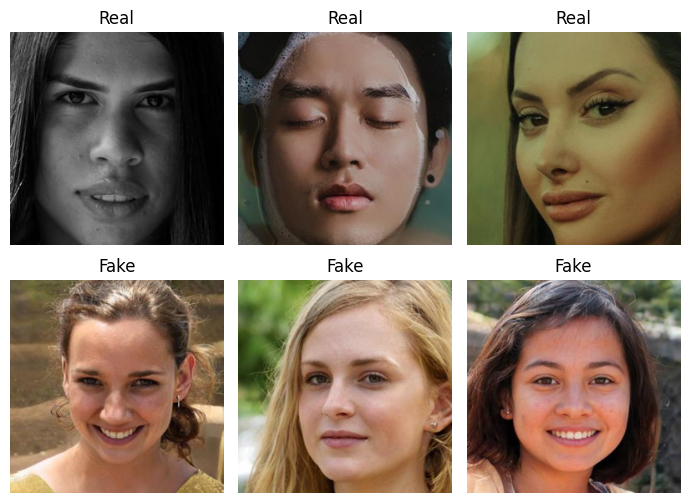

In [ ]:
df_real_images = get_paths(df_real, FAKEVREAL_IMAGE_PATH)
df_fake_images = get_paths(df_fake, FAKEVREAL_IMAGE_PATH)

fig, axes = plt.subplots(2, 3, figsize=(7, 7))

axes = axes.flatten()

length = len(df_real_images)
for i, ax in enumerate(axes):
    if i < length:
        ax.set_title('Real')
        ax.imshow(df_real_images[i])
    else:
        ax.set_title('Fake')
        ax.imshow(df_fake_images[i - length])
    ax.axis('off')

plt.subplots_adjust(hspace=-0.55)
plt.tight_layout()
plt.show()

2. Test Set Images

In [ ]:
file_count = zip_to_colab(project_folder + '/Test_RealImages.zip', 'TestDataset')
file_count += zip_to_colab(project_folder + '/Test_FakeImages.zip', 'TestDataset')
assert len(os.listdir('/content/TestDataset/')) == file_count # Check to make sure no files were overridden
TEST_IMAGE_EXTENSIONS = {'.jpg'}
TEST_IMAGE_PATH = '/content/TestDataset/'

Files from drive/MyDrive/CS4644_FinalProject/Test_RealImages.zip extracted to: /content/TestDataset/
Number of files extracted: 129
Files from drive/MyDrive/CS4644_FinalProject/Test_FakeImages.zip extracted to: /content/TestDataset/
Number of files extracted: 129


In [ ]:
df_testData = pd.read_csv(project_folder + "/test_data.csv")
df_real = df_testData[df_testData['label'] == 1]
df_fake = df_testData[df_testData['label'] == 0]

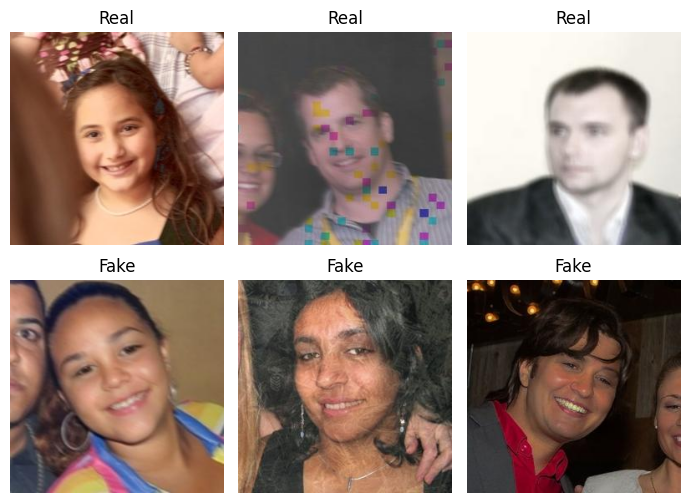

In [ ]:
df_real_images = get_paths(df_real, TEST_IMAGE_PATH, extension="")
df_fake_images = get_paths(df_fake, TEST_IMAGE_PATH, extension="")

fig, axes = plt.subplots(2, 3, figsize=(7, 7))

axes = axes.flatten()

length = len(df_real_images)
for i, ax in enumerate(axes):
    if i < length:
        ax.set_title('Real')
        ax.imshow(df_real_images[i])
    else:
        ax.set_title('Fake')
        ax.imshow(df_fake_images[i - length])
    ax.axis('off')

plt.subplots_adjust(hspace=-0.55)
plt.tight_layout()
plt.show()

## PART 3: Model Visualizations

##### Keras Reference Model

In [ ]:
model_reference_history = load_history('/model_reference_history.csv')
model_reference_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.614937  0.665552      0.604651  0.619672
1           1  0.816683  0.515409      0.976744  0.293375
2           2  0.944714  0.184524      0.984496  0.064374
3           3  0.986421  0.048668      0.992248  0.017873
4           4  0.996120  0.015066      0.992248  0.018840
5           5  0.999030  0.007115      0.992248  0.018905
6           6  1.000000  0.004098      0.992248  0.018898
7           7  1.000000  0.002998      0.992248  0.013096
8           8  1.000000  0.001395      0.992248  0.011817
9           9  1.000000  0.000874      0.992248  0.020474

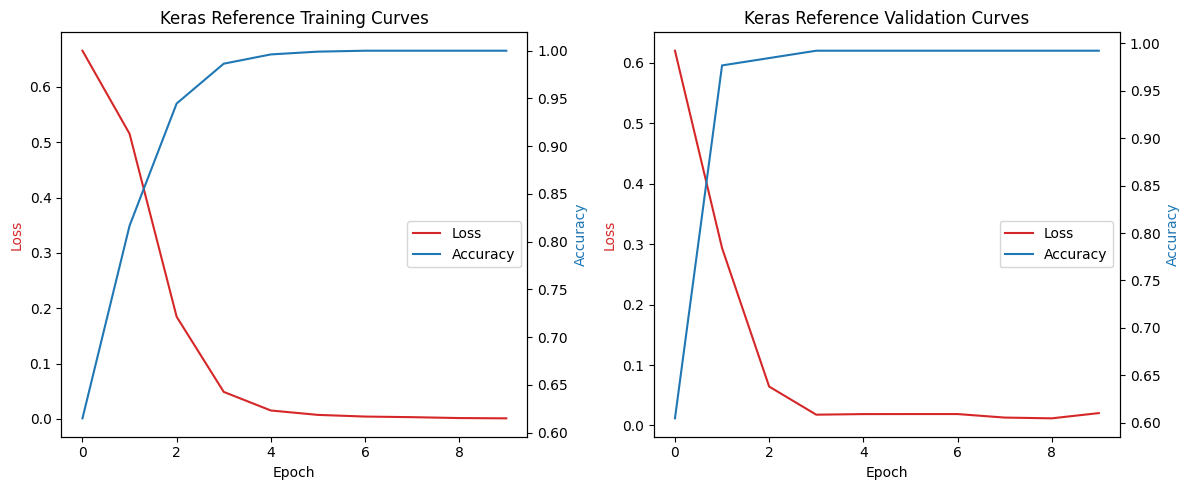

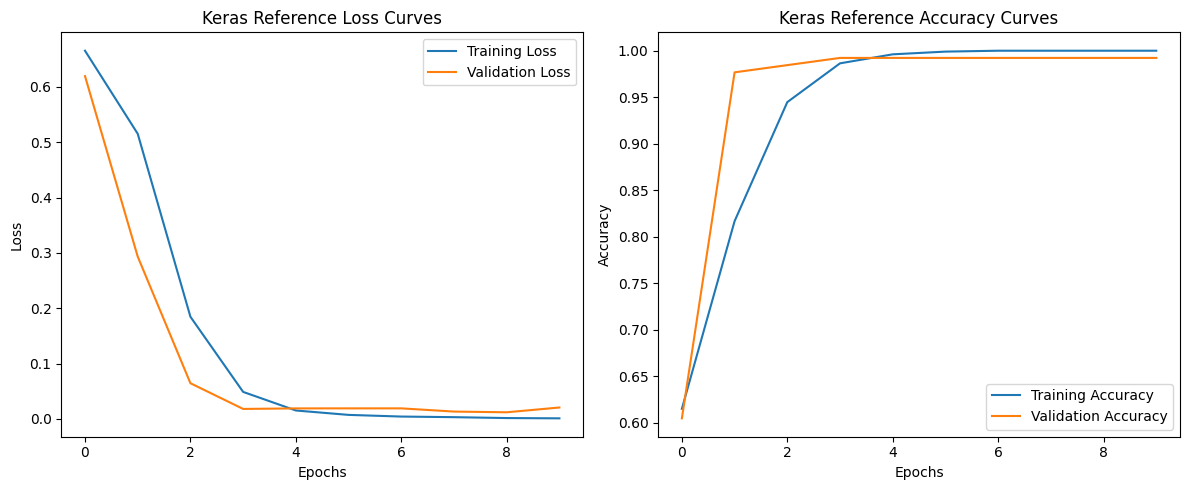

In [ ]:
model_plots("Keras Reference", model_reference_history)

##### PyTorch Conversion Model

In [ ]:
pytorch_conversion_history = load_history('/pytorch_conversion_history.csv')
pytorch_conversion_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.544132  0.688830      0.527132  0.709458
1           1  0.544132  0.685625      0.527132  0.712214
2           2  0.647915  0.595238      0.899225  0.356842
3           3  0.907856  0.251970      0.984496  0.052658
4           4  0.960233  0.098692      1.000000  0.015224
5           5  0.981571  0.054188      1.000000  0.007301
6           6  0.983511  0.044549      0.992248  0.006895
7           7  0.991271  0.021336      1.000000  0.002172
8           8  0.998060  0.006355      1.000000  0.003703
9           9  1.000000  0.003613      1.000000  0.003434

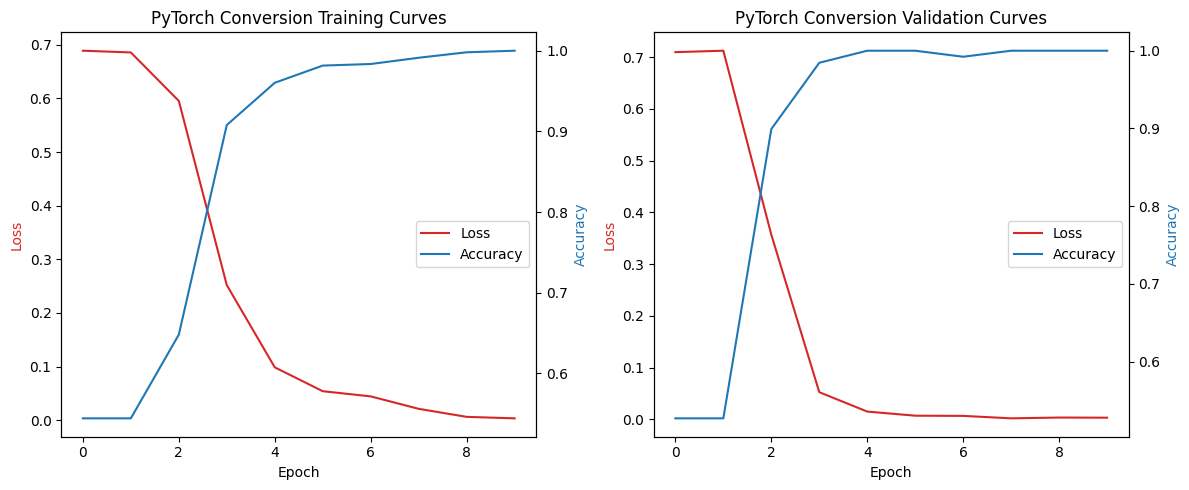

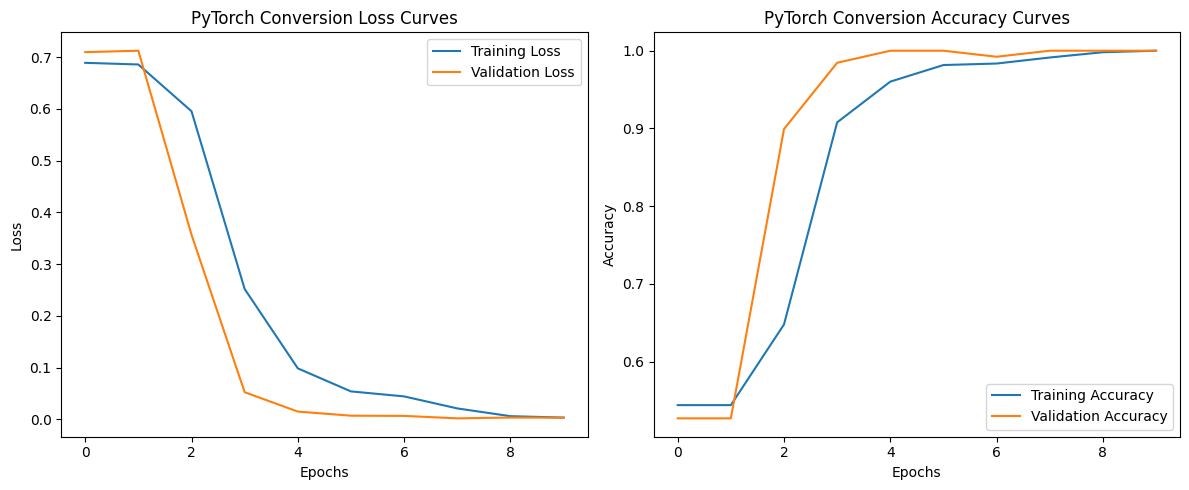

In [ ]:
model_plots("PyTorch Conversion", pytorch_conversion_history)

##### Keras 10x Learning Rate Model

In [ ]:
keras_10x_LR_history = load_history('/keras_10x_LR_history.csv')
keras_10x_LR_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.524733  0.714523      0.527132  0.680802
1           1  0.612997  0.667195      0.527132  0.682976
2           2  0.639185  0.649752      0.658915  0.582118
3           3  0.765276  0.530907      0.852713  0.461249
4           4  0.934045  0.183727      0.984496  0.085991
5           5  0.986421  0.045742      0.984496  0.070695
6           6  0.993210  0.026444      0.984496  0.067329
7           7  0.994180  0.018205      0.976744  0.091121
8           8  0.999030  0.005105      0.976744  0.165726
9           9  0.998060  0.007879      0.984496  0.132023

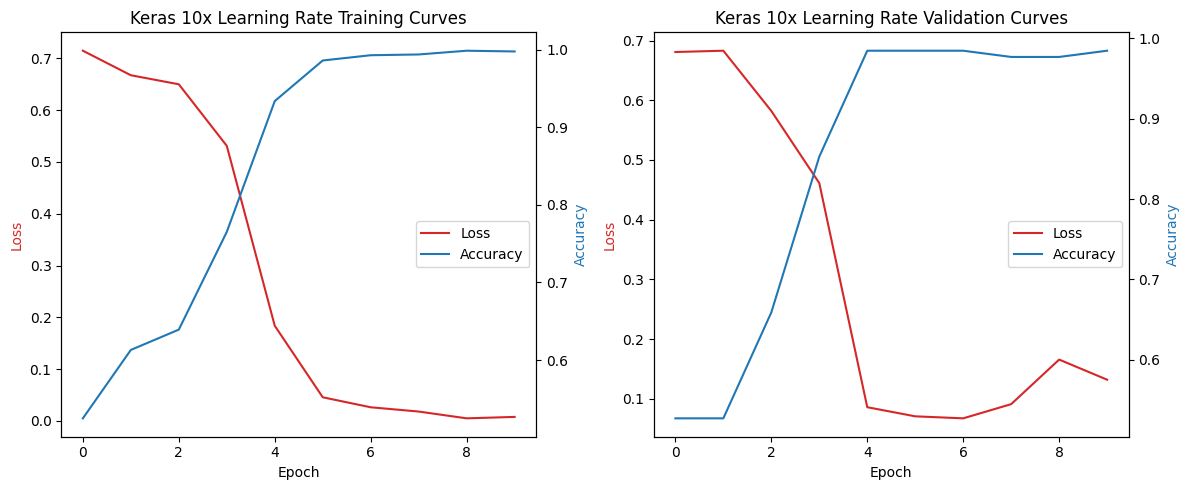

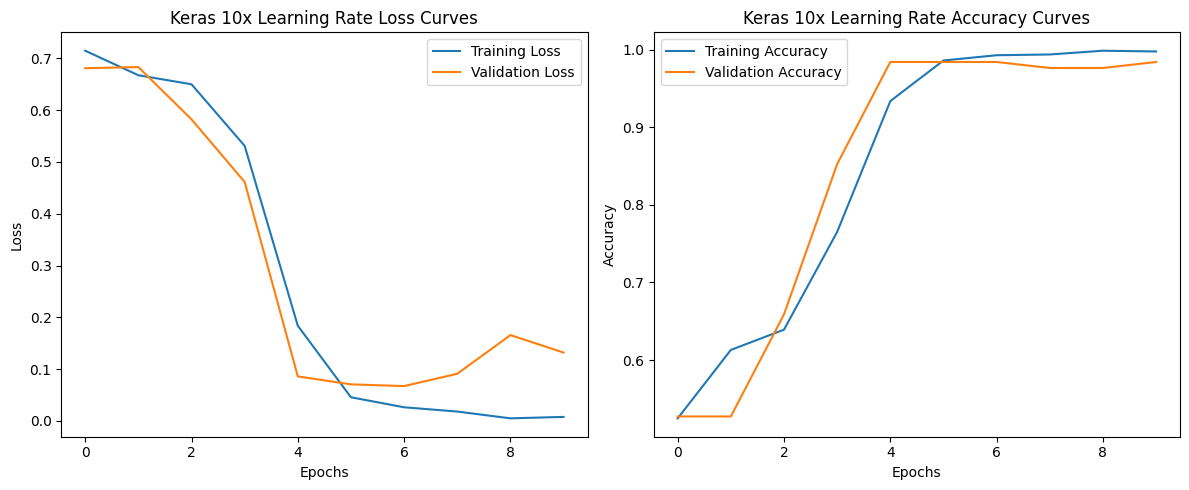

In [ ]:
model_plots("Keras 10x Learning Rate", keras_10x_LR_history)

##### PyTorch 10x Learning Rate Model

In [ ]:
pyTorch_10x_LR_history = load_history('/pytorch_10X_LR_history.csv')
pyTorch_10x_LR_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.528613  0.693946      0.527132  0.710865
1           1  0.552861  0.685452      0.534884  0.724214
2           2  0.716780  0.509352      0.891473  0.161299
3           3  0.928225  0.187892      0.984496  0.034047
4           4  0.975752  0.067390      0.992248  0.040729
5           5  0.985451  0.048428      0.992248  0.019208
6           6  0.994180  0.032762      0.984496  0.029970
7           7  0.995150  0.015821      0.992248  0.013005
8           8  0.996120  0.009654      0.992248  0.017750
9           9  0.997090  0.010666      0.992248  0.006624

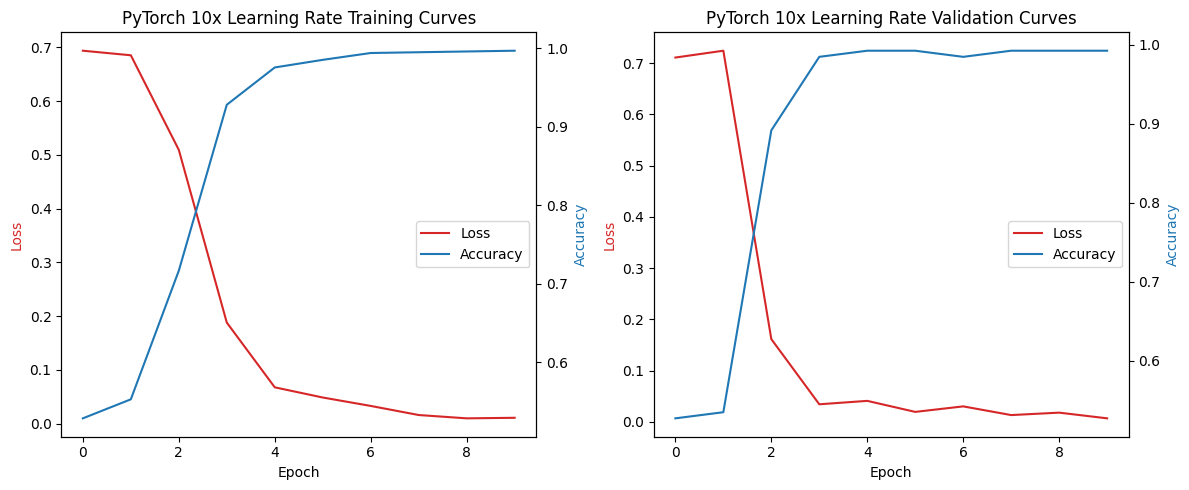

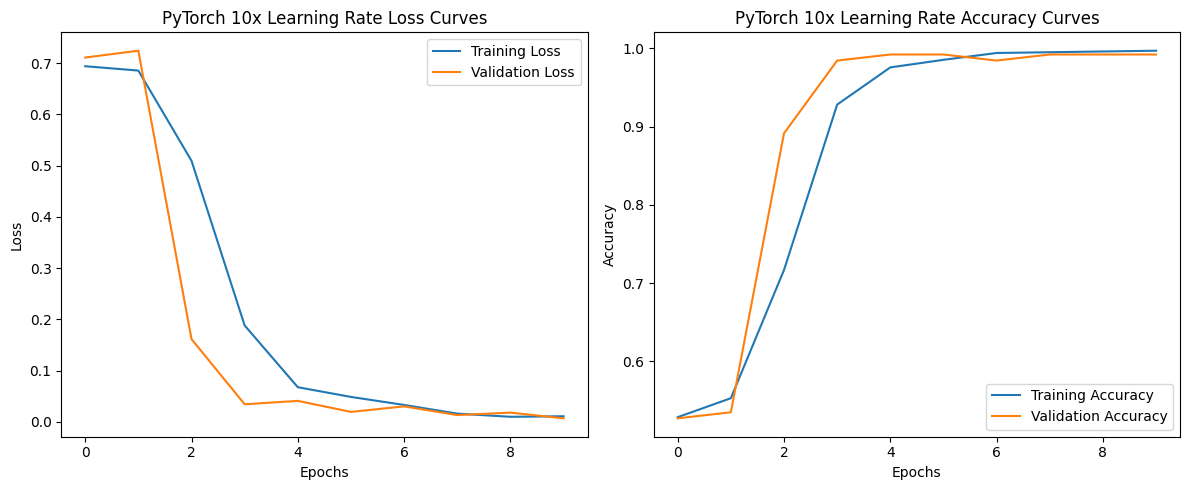

In [ ]:
model_plots("PyTorch 10x Learning Rate", pyTorch_10x_LR_history)

##### Keras 100x Learning Rate Model

In [ ]:
keras_100x_LR_history = load_history('/keras_100x_LR_history.csv')
keras_100x_LR_history

Unnamed: 0  accuracy       loss  val_accuracy  val_loss
0           0  0.516004  42.487522      0.527132  0.694379
1           1  0.472357   0.722698      0.527132  0.693035
2           2  0.520854   0.694006      0.527132  0.692397
3           3  0.544132   0.690871      0.527132  0.692664
4           4  0.544132   0.690329      0.527132  0.692985
5           5  0.544132   0.690391      0.527132  0.692815
6           6  0.544132   0.689770      0.527132  0.696969
7           7  0.544132   0.691528      0.527132  0.691975
8           8  0.544132   0.689944      0.527132  0.692275
9           9  0.544132   0.689654      0.527132  0.692706

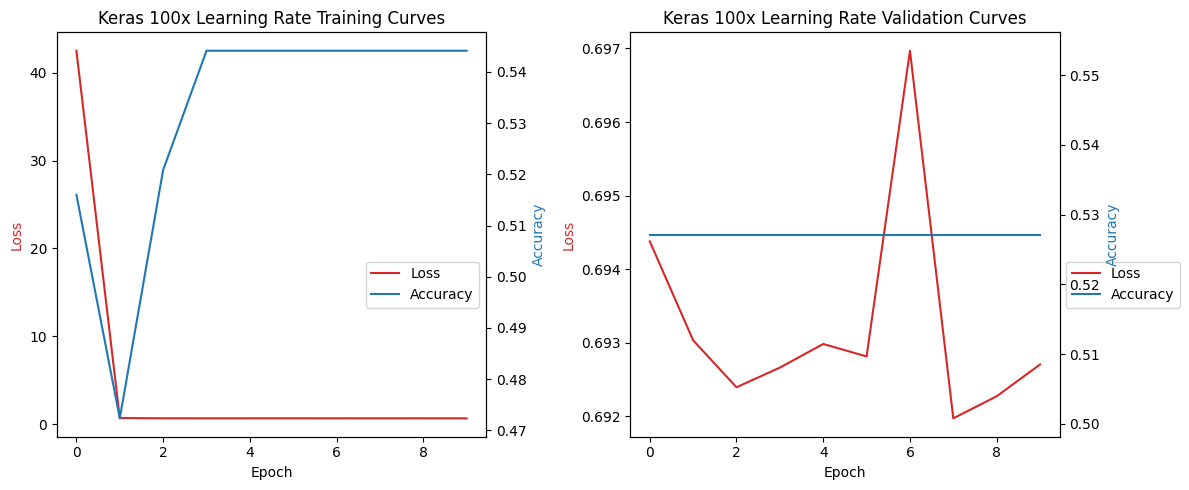

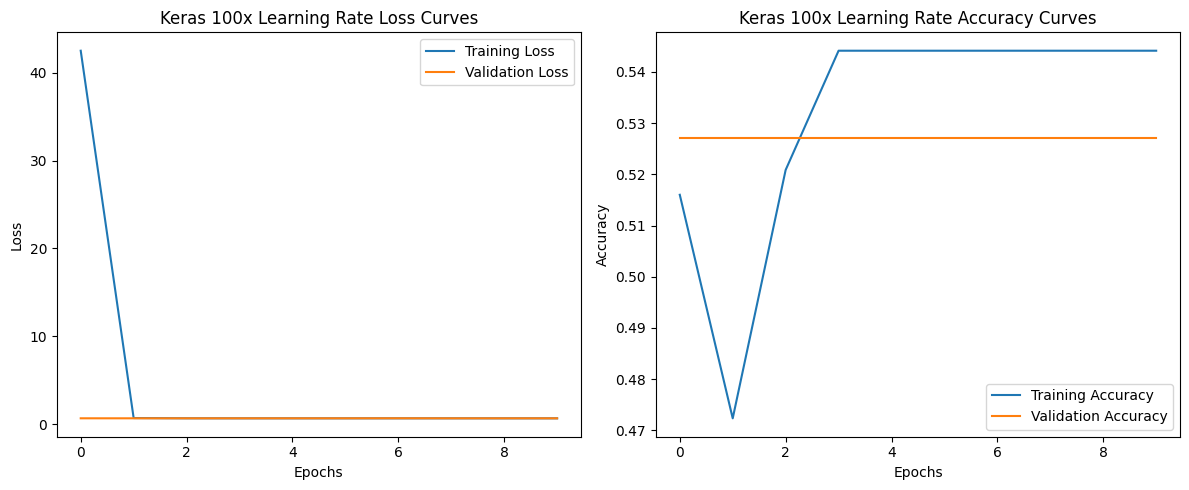

In [ ]:
model_plots("Keras 100x Learning Rate", keras_100x_LR_history, yshift=0.45)

##### PyTorch 100x Learning Rate Model

In [ ]:
pyTorch_100x_LR_history = load_history('/pytorch_100X_LR_history.csv')
pyTorch_100x_LR_history

Unnamed: 0  accuracy        loss  val_accuracy  val_loss
0           0  0.487876  284.194304      0.503876  0.689490
1           1  0.557711    0.707747      0.527132  0.667313
2           2  0.568380    0.675596      0.527132  0.699199
3           3  0.623666    0.664388      0.565891  0.668827
4           4  0.723569    0.523041      0.767442  0.389926
5           5  0.875849    0.284079      0.914729  0.152018
6           6  0.919496    0.184075      0.937984  0.085081
7           7  0.964113    0.082305      0.961240  0.061726
8           8  0.979631    0.053869      0.992248  0.023138
9           9  0.980601    0.052932      0.992248  0.012412

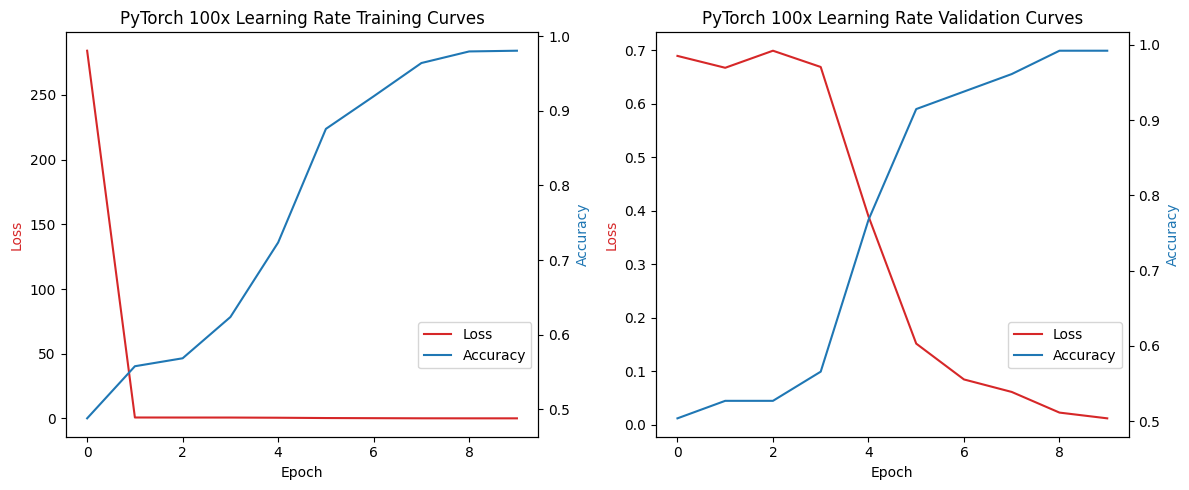

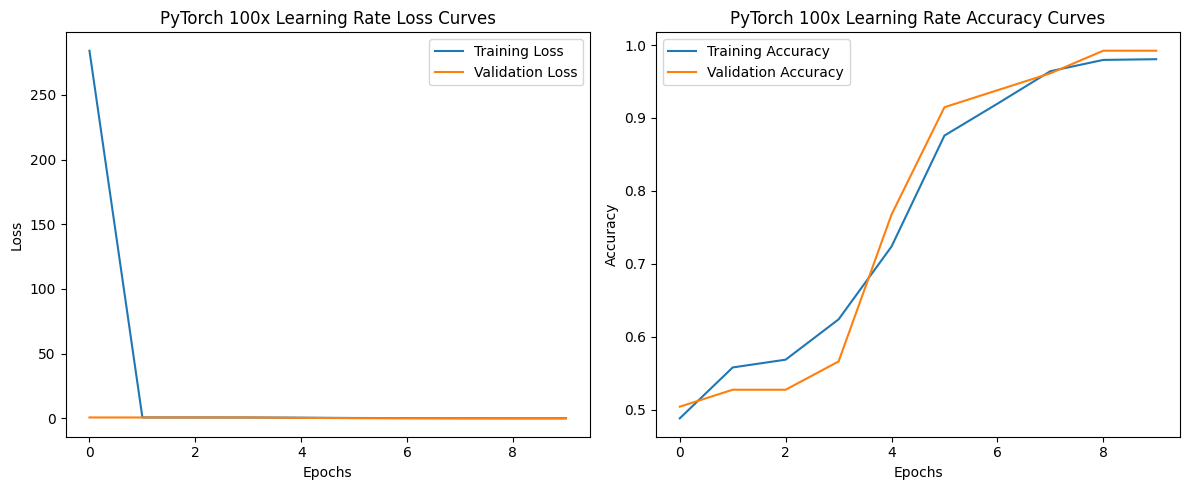

In [ ]:
model_plots("PyTorch 100x Learning Rate", pyTorch_100x_LR_history, yshift=0.3)

##### Keras Additional Layers Model

In [ ]:
keras_additional_conv_history = load_history('/keras_additional_conv_history.csv')
keras_additional_conv_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.569350  0.676642      0.527132  0.655175
1           1  0.822502  0.519622      0.930233  0.248720
2           2  0.941804  0.152638      0.976744  0.068603
3           3  0.984481  0.049238      0.992248  0.010134
4           4  0.997090  0.012193      1.000000  0.008006
5           5  1.000000  0.003924      0.992248  0.006122
6           6  0.998060  0.005272      1.000000  0.006338
7           7  1.000000  0.002417      0.992248  0.017967
8           8  0.999030  0.002584      0.992248  0.008754
9           9  1.000000  0.001556      0.992248  0.012596

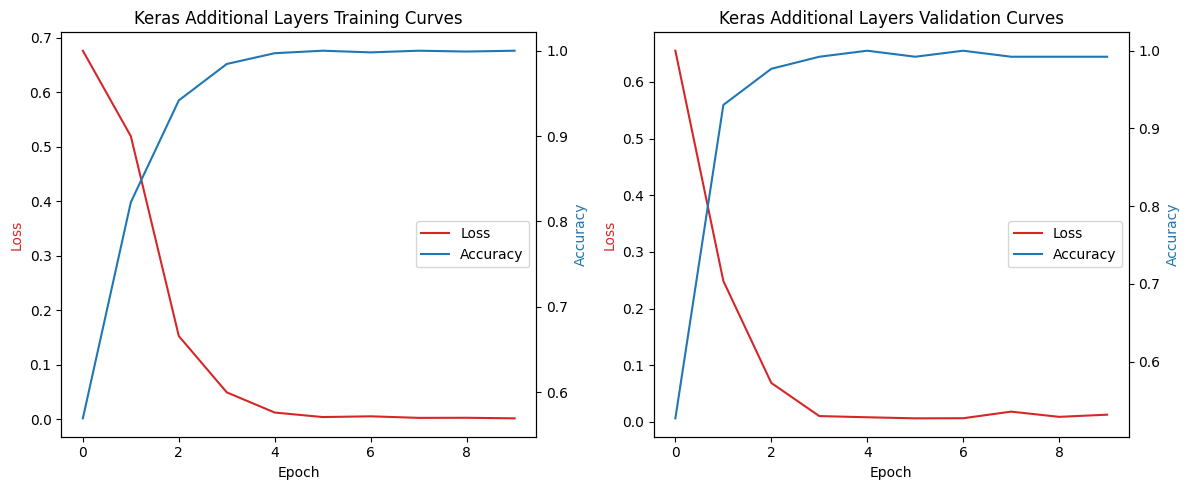

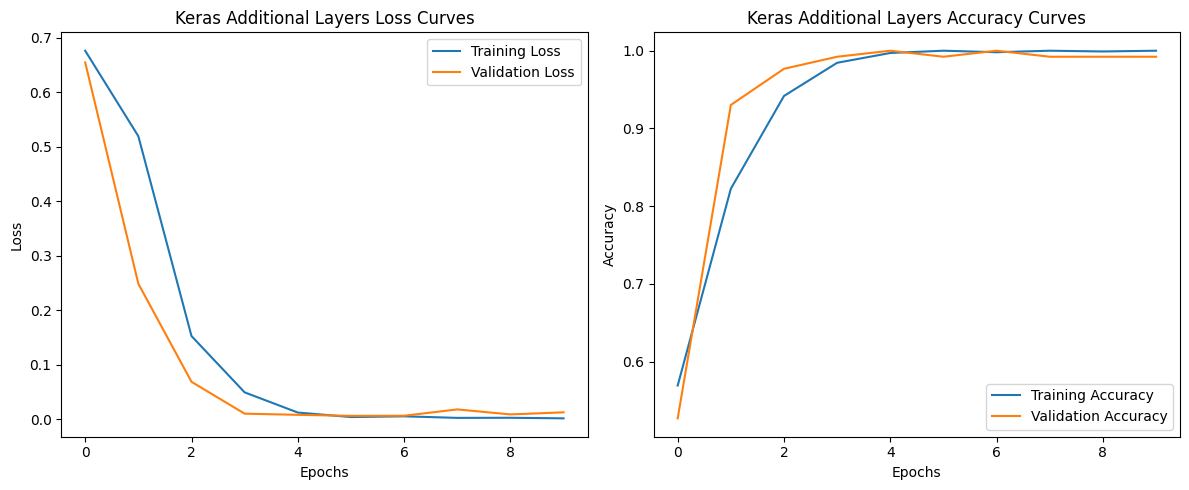

In [ ]:
model_plots("Keras Additional Layers", keras_additional_conv_history)

##### PyTorch Additional Layers Model

In [ ]:
pyTorch_additional_conv_history = load_history('/pytorch_additional_conv_history.csv')
pyTorch_additional_conv_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.538312  0.691131      0.527132  0.712493
1           1  0.544132  0.690017      0.527132  0.711606
2           2  0.549952  0.665772      0.899225  0.628778
3           3  0.867119  0.348142      0.891473  0.265051
4           4  0.932105  0.225409      0.984496  0.071252
5           5  0.980601  0.065344      1.000000  0.008105
6           6  0.990301  0.032124      0.992248  0.013883
7           7  0.997090  0.017952      0.992248  0.025453
8           8  0.995150  0.020947      0.992248  0.039700
9           9  0.996120  0.009069      0.992248  0.032373

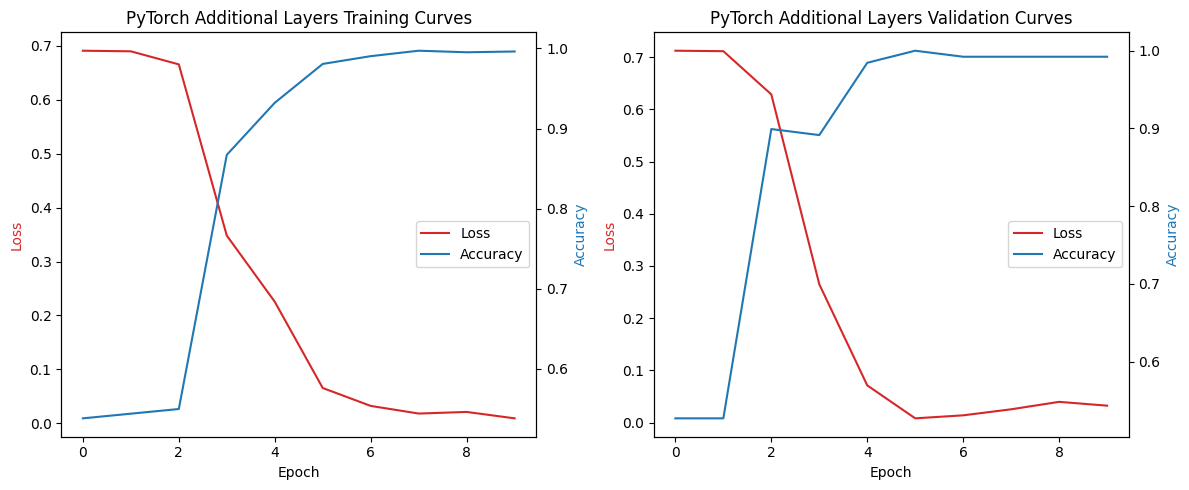

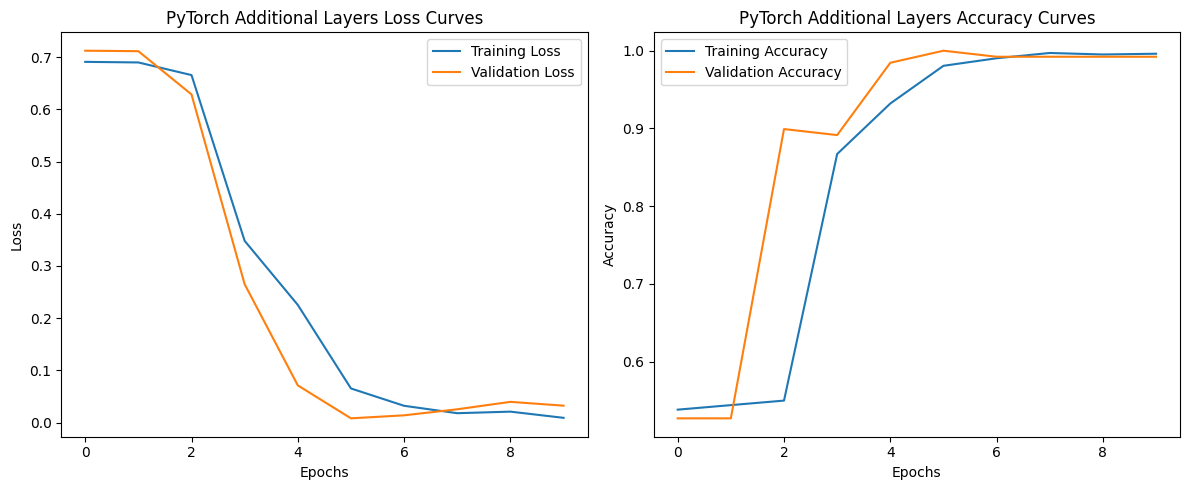

In [ ]:
model_plots("PyTorch Additional Layers", pyTorch_additional_conv_history)

##### Keras Image Transforms Model

In [ ]:
keras_imageTransforms_history = load_history('/keras_imageTransforms_history.csv')
keras_imageTransforms_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.544132  0.685983      0.527132  0.677658
1           1  0.641125  0.647865      0.472868  0.730940
2           2  0.668283  0.618554      0.790698  0.564942
3           3  0.741998  0.475473      0.883721  0.415317
4           4  0.893307  0.277165      0.961240  0.154213
5           5  0.958293  0.132798      1.000000  0.052430
6           6  0.979631  0.064683      0.992248  0.026573
7           7  0.988361  0.040745      0.992248  0.019979
8           8  0.991271  0.032026      0.992248  0.030297
9           9  0.993210  0.021313      0.992248  0.022865

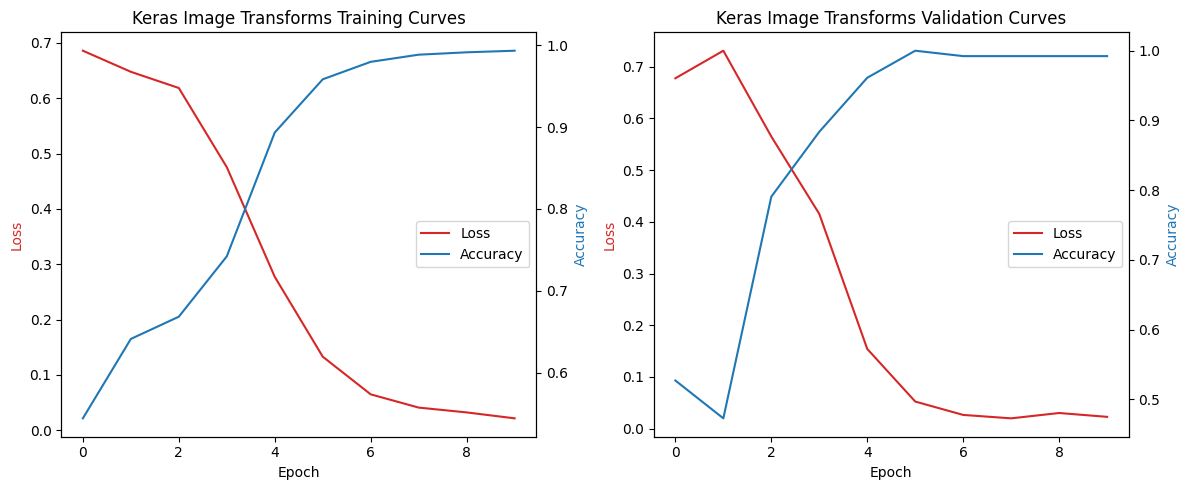

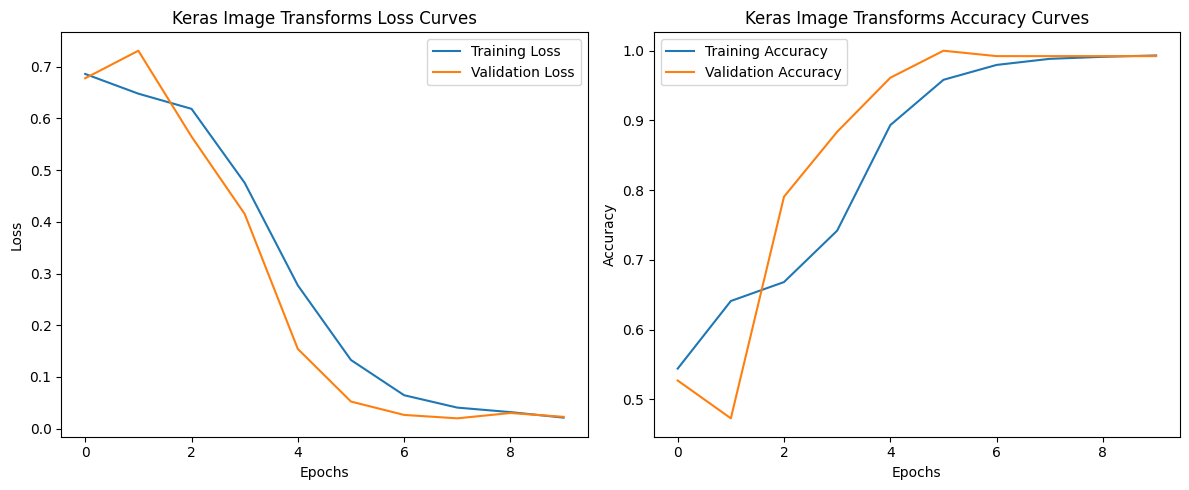

In [ ]:
model_plots("Keras Image Transforms", keras_imageTransforms_history)

##### PyTorch Image Transforms Model

In [ ]:
pyTorch_imageTransforms_history = load_history('/pyTorch_imageTransforms_history.csv')
pyTorch_imageTransforms_history

Unnamed: 0  accuracy      loss  val_accuracy  val_loss
0           0  0.567410  0.681479      0.527132  0.702678
1           1  0.746848  0.502354      0.837209  0.597151
2           2  0.940834  0.158980      0.875969  0.485895
3           3  0.963143  0.098739      0.945736  0.427938
4           4  0.984481  0.051587      0.961240  0.376369
5           5  0.995150  0.022891      0.953488  0.304323
6           6  0.997090  0.013631      0.984496  0.227418
7           7  0.997090  0.008284      0.976744  0.216999
8           8  0.998060  0.005351      0.968992  0.175919
9           9  1.000000  0.002562      0.953488  0.172967

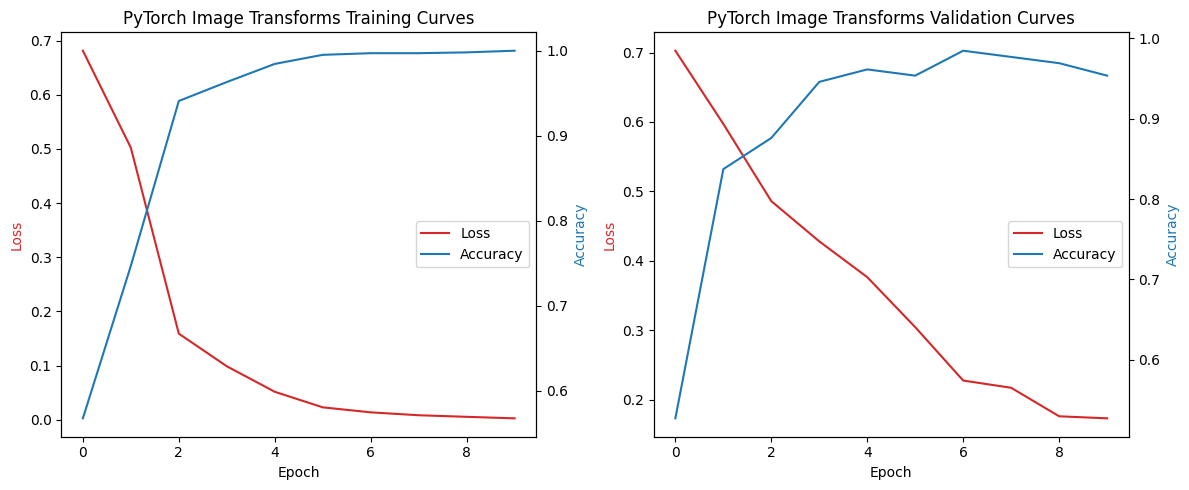

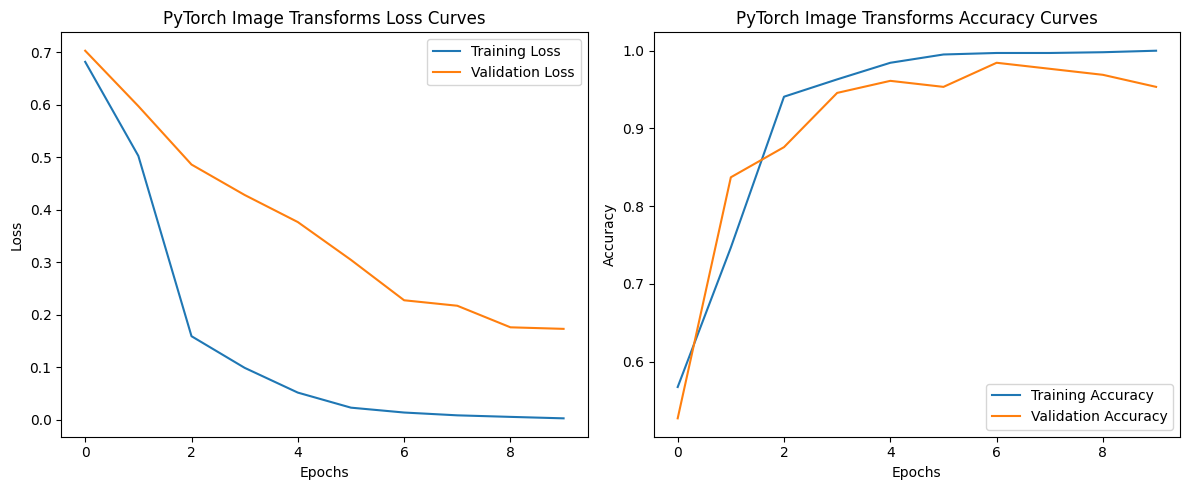

In [ ]:
model_plots("PyTorch Image Transforms", pyTorch_imageTransforms_history)

## PART 3: Model Comparisons

##### Keras vs. PyTorch

Table

In [ ]:
FinalResults = [df.tail(1) for df in [model_reference_history, pytorch_conversion_history]]
FinalResults = pd.concat(FinalResults, ignore_index=True)
FinalResults['Model'] = ['Keras Reference', 'PyTorch Conversion']
FinalResults

Unnamed: 0  accuracy      loss  val_accuracy  val_loss               Model
0           9       1.0  0.000874      0.992248  0.020474     Keras Reference
1           9       1.0  0.003613      1.000000  0.003434  PyTorch Conversion

BASELINE: Keras Reference vs. PyTorch Conversion

Loss Difference:
 0    0.023278
1    0.170216
2    0.410714
3    0.203303
4    0.083626
5    0.047073
6    0.040451
7    0.018338
8    0.004960
9    0.002739
Name: loss, dtype: float64
Max Loss Difference: 0.4107142888447818
Accuracy Difference:
 0    0.070805
1    0.272551
2    0.296799
3    0.078564
4    0.035887
5    0.017459
6    0.016489
7    0.008729
8    0.001940
9    0.000000
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.296799244577739


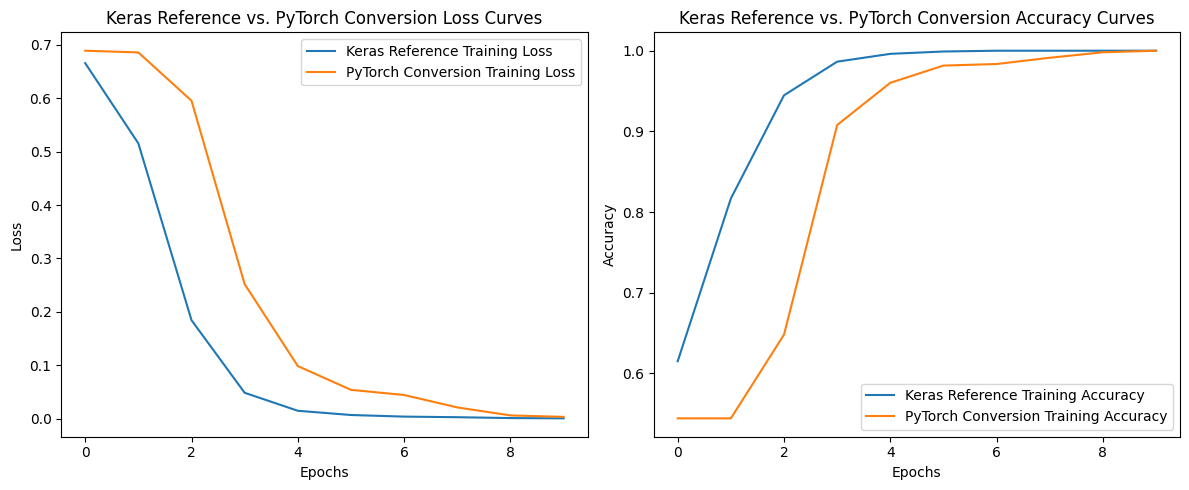

Loss Difference:
 0    0.089786
1    0.418839
2    0.292468
3    0.034785
4    0.003615
5    0.011604
6    0.012004
7    0.010924
8    0.008115
9    0.017040
Name: val_loss, dtype: float64
Max Loss Difference: 0.4188389976819357
Accuracy Difference:
 0    7.751937e-02
1    4.496124e-01
2    8.527131e-02
3    7.751934e-03
4    7.751942e-03
5    7.751942e-03
6    3.696412e-09
7    7.751942e-03
8    7.751942e-03
9    7.751942e-03
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.4496123920115389


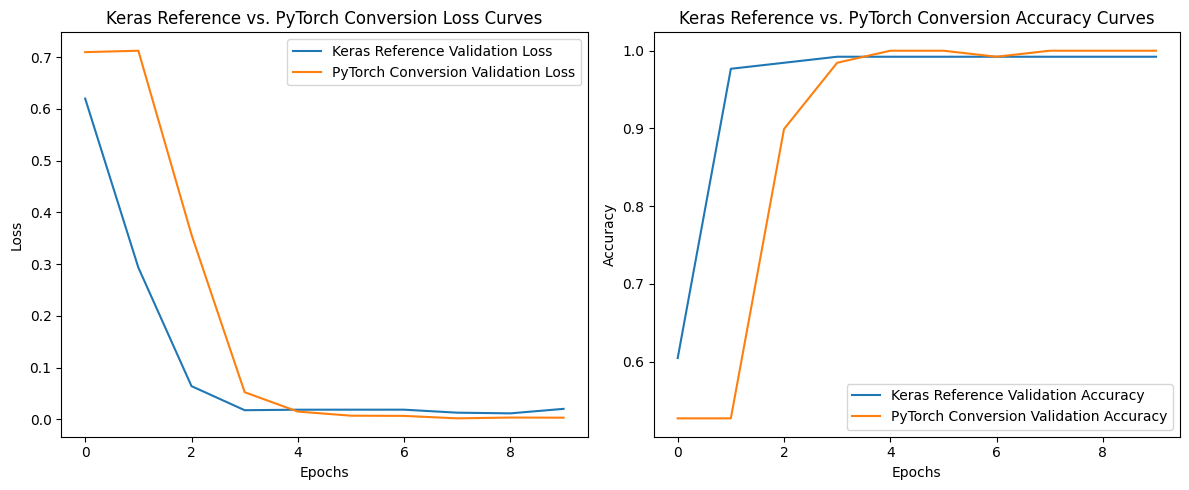

In [ ]:
full_model_comparison("Keras Reference", model_reference_history, "PyTorch Conversion", pytorch_conversion_history)

10x Learning Rate

Loss Difference:
 0    0.020577
1    0.018257
2    0.140400
3    0.343015
4    0.116337
5    0.002686
6    0.006318
7    0.002384
8    0.004549
9    0.002787
Name: loss, dtype: float64
Max Loss Difference: 0.3430149002986796
Accuracy Difference:
 0    0.003880
1    0.060136
2    0.077595
3    0.162949
4    0.041707
5    0.000970
6    0.000970
7    0.000970
8    0.002910
9    0.000970
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.16294859221094926


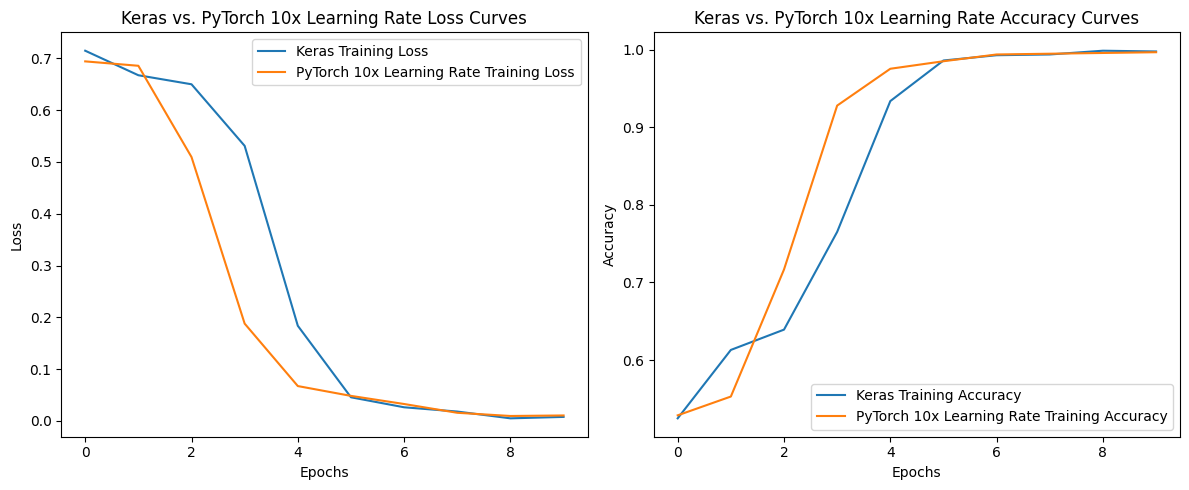

Loss Difference:
 0    0.030062
1    0.041238
2    0.420819
3    0.427202
4    0.045262
5    0.051488
6    0.037359
7    0.078116
8    0.147976
9    0.125398
Name: val_loss, dtype: float64
Max Loss Difference: 0.427202274169152
Accuracy Difference:
 0    1.293744e-08
1    7.751925e-03
2    2.325581e-01
3    1.317830e-01
4    7.751945e-03
5    7.751945e-03
6    7.392824e-09
7    1.550389e-02
8    1.550389e-02
9    7.751945e-03
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.2325581233630809


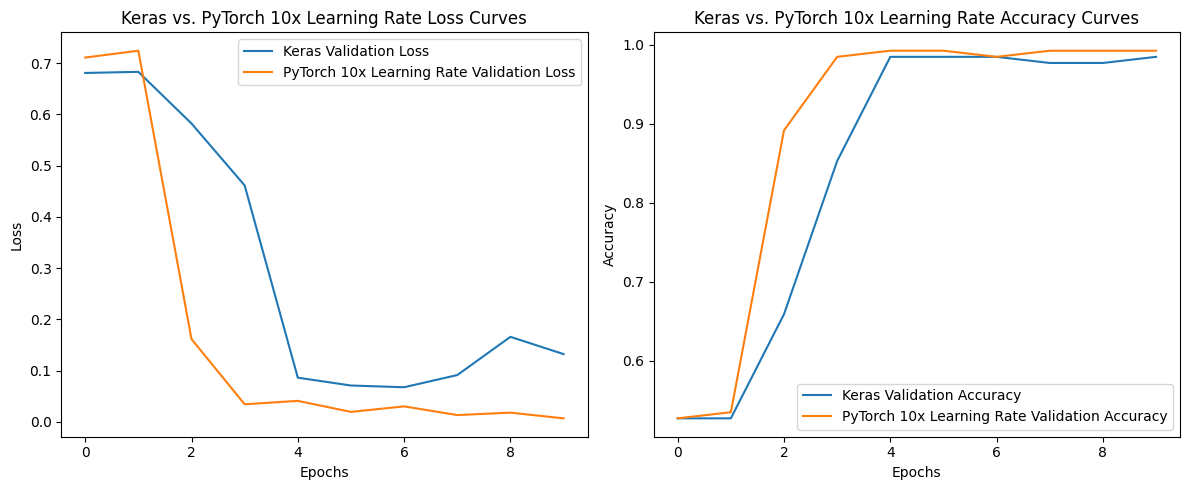

In [ ]:
full_model_comparison("Keras", keras_10x_LR_history, "PyTorch 10x Learning Rate", pyTorch_10x_LR_history)

100x Learning Rate

Loss Difference:
 0    241.706782
1      0.014952
2      0.018409
3      0.026483
4      0.167287
5      0.406313
6      0.505695
7      0.609223
8      0.636076
9      0.636723
Name: loss, dtype: float64
Max Loss Difference: 241.70678229191725
Accuracy Difference:
 0    0.028128
1    0.085354
2    0.047527
3    0.079534
4    0.179437
5    0.331717
6    0.375364
7    0.419981
8    0.435499
9    0.436469
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.4364694232621549


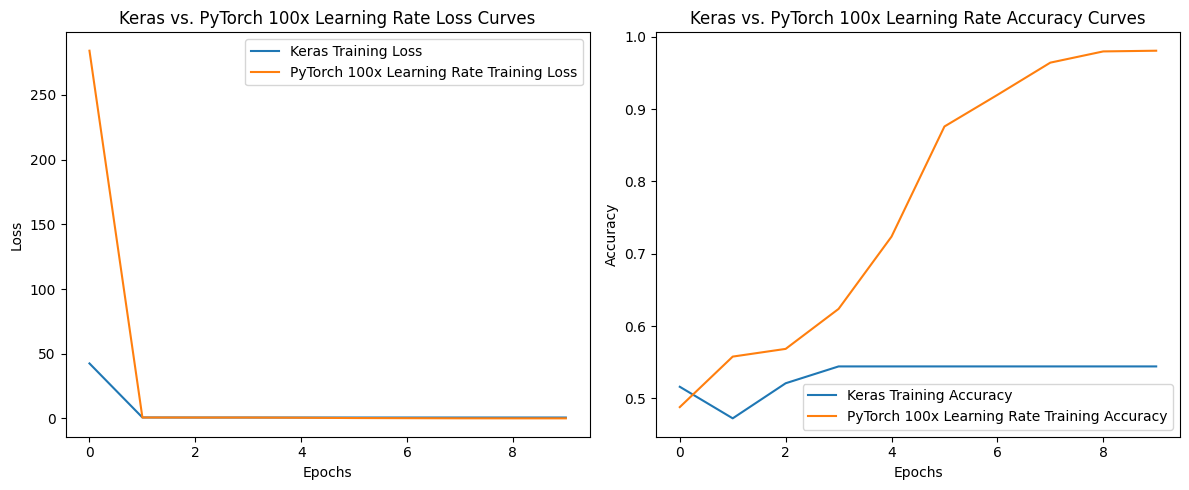

Loss Difference:
 0    0.004889
1    0.025722
2    0.006802
3    0.023837
4    0.303059
5    0.540797
6    0.611888
7    0.630248
8    0.669136
9    0.680294
Name: val_loss, dtype: float64
Max Loss Difference: 0.6802940405905248
Accuracy Difference:
 0    2.325583e-02
1    1.293744e-08
2    1.293744e-08
3    3.875968e-02
4    2.403101e-01
5    3.875969e-01
6    4.108527e-01
7    4.341085e-01
8    4.651163e-01
9    4.651163e-01
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.46511626613232526


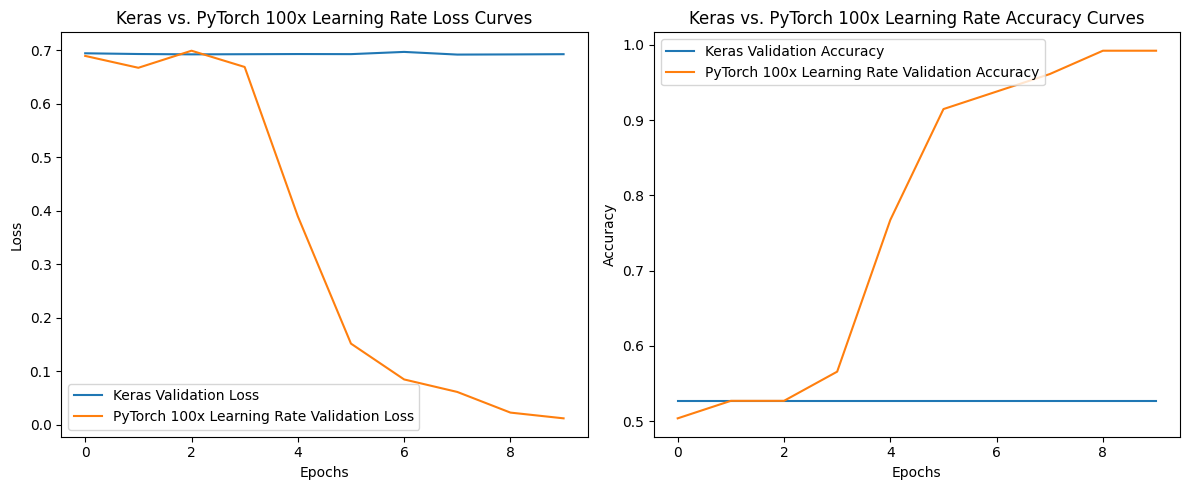

In [ ]:
full_model_comparison("Keras", keras_100x_LR_history, "PyTorch 100x Learning Rate", pyTorch_100x_LR_history)

Additional Layers

Loss Difference:
 0    0.014490
1    0.170395
2    0.513133
3    0.298905
4    0.213216
5    0.061419
6    0.026852
7    0.015535
8    0.018363
9    0.007513
Name: loss, dtype: float64
Max Loss Difference: 0.5131331165047253
Accuracy Difference:
 0    0.031038
1    0.278371
2    0.391853
3    0.117362
4    0.064985
5    0.019399
6    0.007759
7    0.002910
8    0.003880
9    0.003880
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.39185254800446856


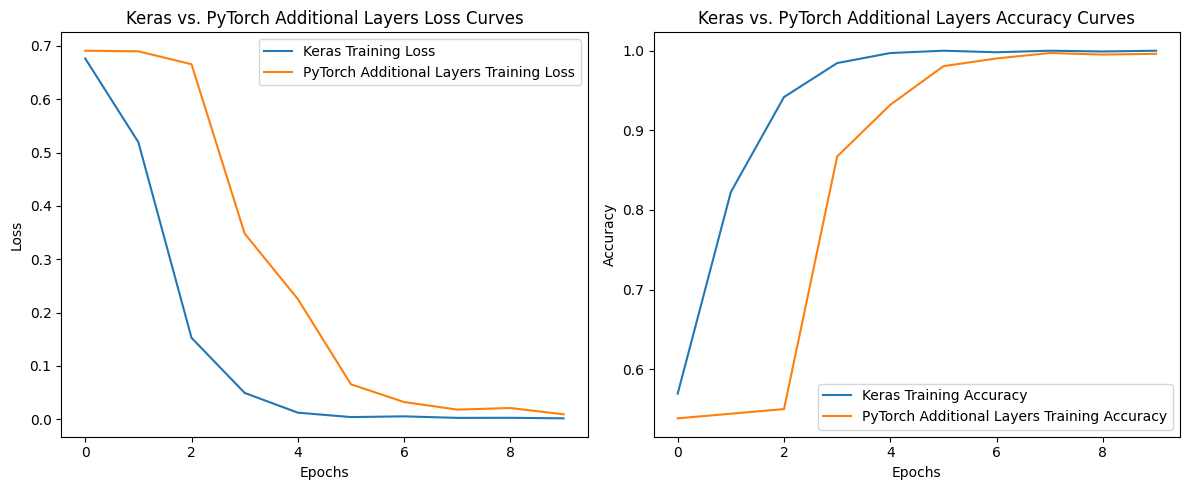

Loss Difference:
 0    0.057318
1    0.462886
2    0.560175
3    0.254917
4    0.063246
5    0.001983
6    0.007545
7    0.007486
8    0.030946
9    0.019776
Name: val_loss, dtype: float64
Max Loss Difference: 0.5601748501261077
Accuracy Difference:
 0    1.293744e-08
1    4.031008e-01
2    7.751937e-02
3    1.007752e-01
4    1.550388e-02
5    7.751942e-03
6    7.751938e-03
7    3.696412e-09
8    3.696412e-09
9    3.696412e-09
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.40310080153073446


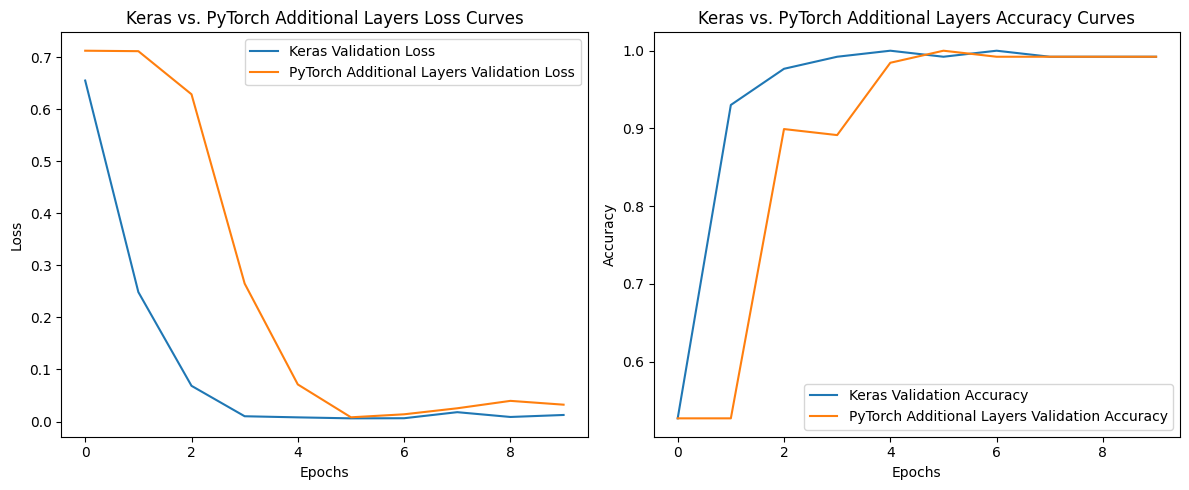

In [ ]:
full_model_comparison("Keras", keras_additional_conv_history, "PyTorch Additional Layers", pyTorch_additional_conv_history)

Image Transforms

Loss Difference:
 0    0.004504
1    0.145511
2    0.459574
3    0.376735
4    0.225578
5    0.109907
6    0.051051
7    0.032461
8    0.026675
9    0.018751
Name: loss, dtype: float64
Max Loss Difference: 0.4595738368875841
Accuracy Difference:
 0    0.023278
1    0.105723
2    0.272551
3    0.221145
4    0.091174
5    0.036857
6    0.017459
7    0.008729
8    0.006790
9    0.006790
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.2725509175042522


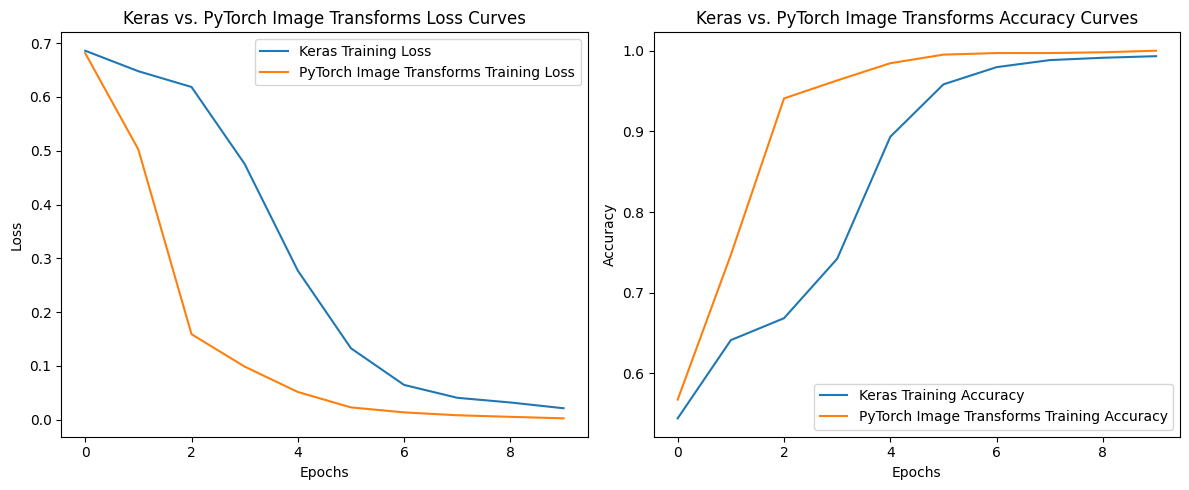

Loss Difference:
 0    0.025020
1    0.133789
2    0.079047
3    0.012622
4    0.222156
5    0.251892
6    0.200845
7    0.197020
8    0.145621
9    0.150102
Name: val_loss, dtype: float64
Max Loss Difference: 0.2518924896915754
Accuracy Difference:
 0    1.293744e-08
1    3.643411e-01
2    8.527130e-02
3    6.201550e-02
4    1.848206e-08
5    4.651163e-02
6    7.751934e-03
7    1.550387e-02
8    2.325581e-02
9    3.875969e-02
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.36434109820876015


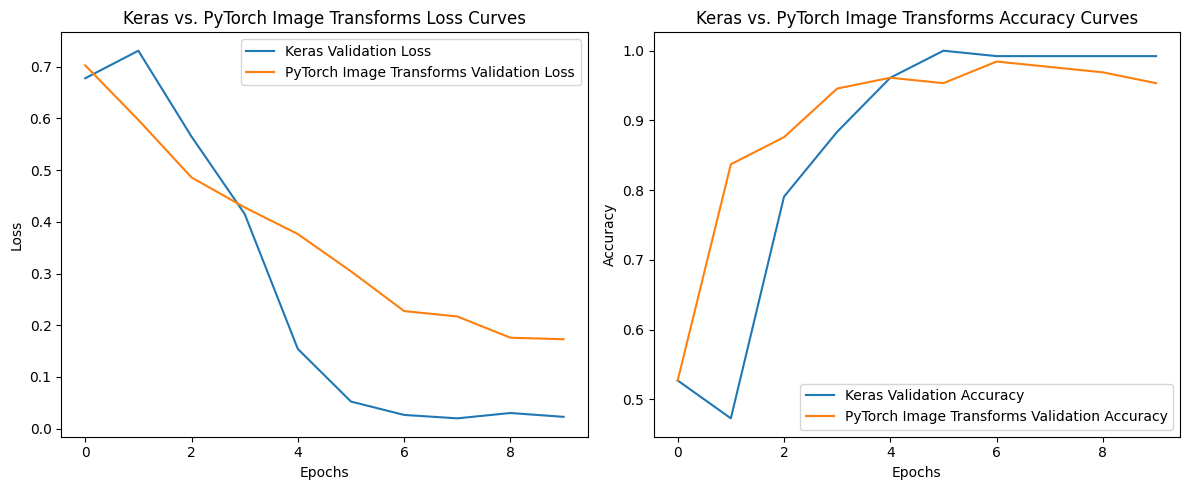

In [ ]:
full_model_comparison("Keras", keras_imageTransforms_history, "PyTorch Image Transforms", pyTorch_imageTransforms_history)

##### Optimizations vs. Baseline (Keras)

Table

In [ ]:
Keras_FinalResults = [df.tail(1) for df in [model_reference_history, keras_10x_LR_history, keras_100x_LR_history, keras_additional_conv_history, keras_imageTransforms_history]]
Keras_FinalResults = pd.concat(Keras_FinalResults, ignore_index=True)
Keras_FinalResults['Model'] = ['Keras Reference', 'Keras 10x Learning Rate', 'Keras 100x Learning Rate', 'Keras Additional Layers', 'Keras Image Transforms']
Keras_FinalResults

Unnamed: 0  accuracy      loss  val_accuracy  val_loss  \
0           9  1.000000  0.000874      0.992248  0.020474   
1           9  0.998060  0.007879      0.984496  0.132023   
2           9  0.544132  0.689654      0.527132  0.692706   
3           9  1.000000  0.001556      0.992248  0.012596   
4           9  0.993210  0.021313      0.992248  0.022865   

                      Model  
0           Keras Reference  
1   Keras 10x Learning Rate  
2  Keras 100x Learning Rate  
3   Keras Additional Layers  
4    Keras Image Transforms

10x Learning Rate

Loss Difference:
 0    0.048971
1    0.151786
2    0.465228
3    0.482240
4    0.168661
5    0.038628
6    0.022345
7    0.015207
8    0.003710
9    0.007006
Name: loss, dtype: float64
Max Loss Difference: 0.4822397232055664
Accuracy Difference:
 0    0.090204
1    0.203686
2    0.305529
3    0.221144
4    0.062076
5    0.012609
6    0.006790
7    0.005820
8    0.000970
9    0.001940
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.3055286407470703


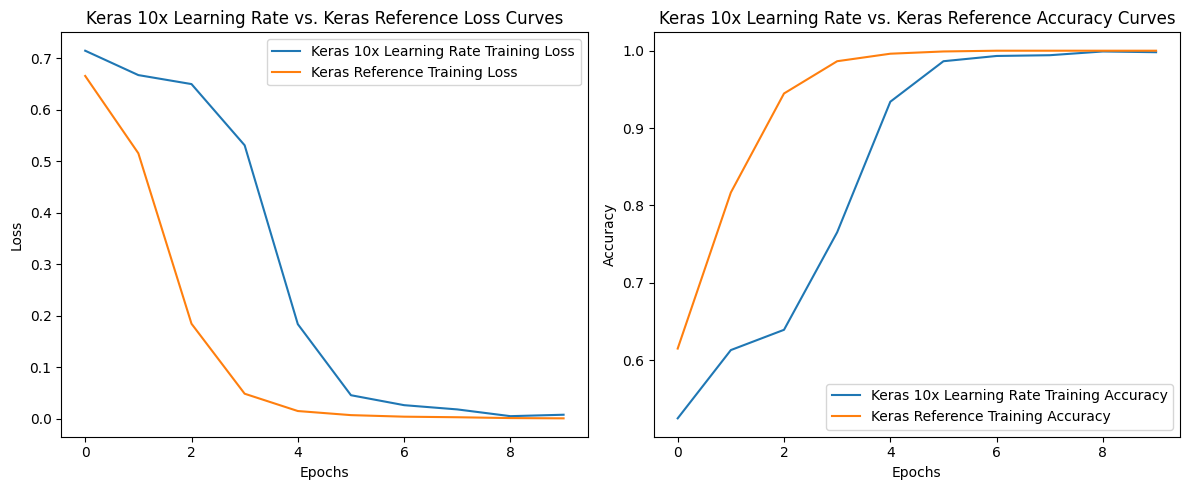

Loss Difference:
 0    0.061130
1    0.389600
2    0.517744
3    0.443375
4    0.067152
5    0.051790
6    0.048431
7    0.078025
8    0.153909
9    0.111548
Name: val_loss, dtype: float64
Max Loss Difference: 0.5177437886595726
Accuracy Difference:
 0    0.077519
1    0.449612
2    0.325581
3    0.139535
4    0.007752
5    0.007752
6    0.007752
7    0.015504
8    0.015504
9    0.007752
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.4496123790740967


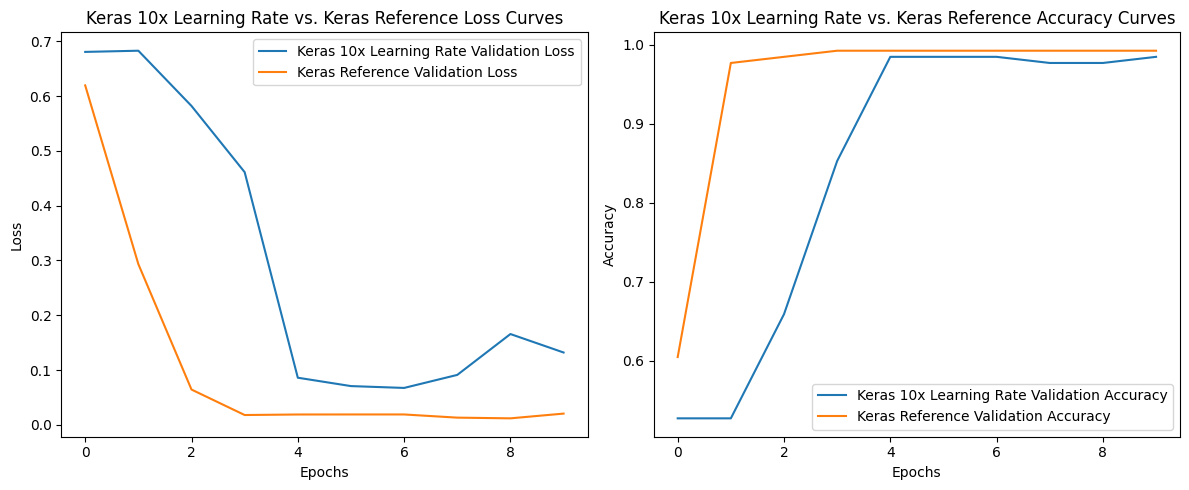

In [ ]:
full_model_comparison("Keras 10x Learning Rate", keras_10x_LR_history, "Keras Reference", model_reference_history)

100x Learning Rate

Loss Difference:
 0    41.821970
1     0.207289
2     0.509482
3     0.642203
4     0.675263
5     0.683277
6     0.685672
7     0.688530
8     0.688549
9     0.688781
Name: loss, dtype: float64
Max Loss Difference: 41.821969866752625
Accuracy Difference:
 0    0.098933
1    0.344326
2    0.423860
3    0.442289
4    0.451988
5    0.454898
6    0.455868
7    0.455868
8    0.455868
9    0.455868
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.45586806535720825


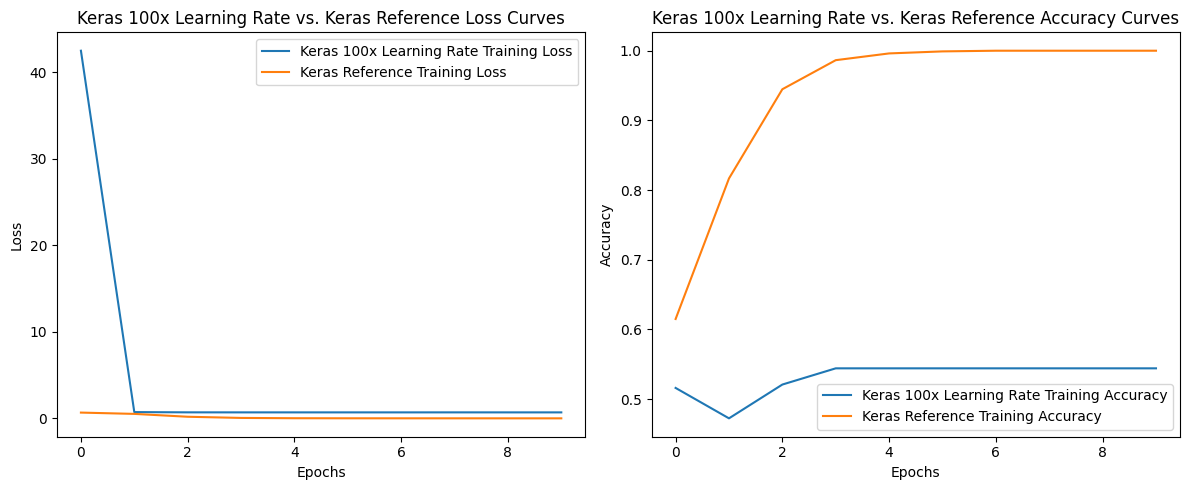

Loss Difference:
 0    0.074707
1    0.399659
2    0.628023
3    0.674790
4    0.674145
5    0.673910
6    0.678070
7    0.678878
8    0.680457
9    0.672232
Name: val_loss, dtype: float64
Max Loss Difference: 0.6804571337997914
Accuracy Difference:
 0    0.077519
1    0.449612
2    0.457364
3    0.465116
4    0.465116
5    0.465116
6    0.465116
7    0.465116
8    0.465116
9    0.465116
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.4651162624359131


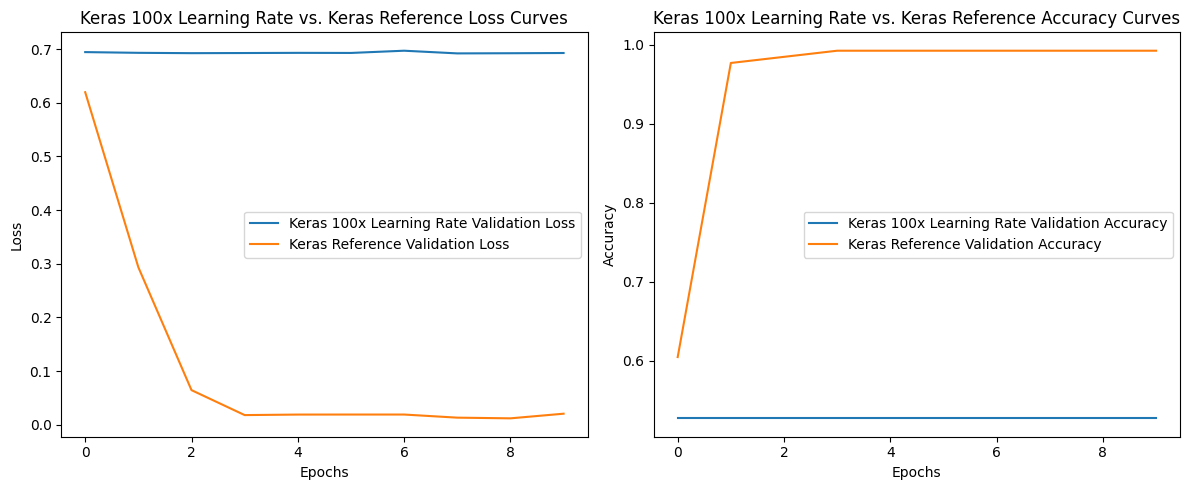

In [ ]:
full_model_comparison("Keras 100x Learning Rate", keras_100x_LR_history, "Keras Reference", model_reference_history)

Additional Layers

Loss Difference:
 0    0.011089
1    0.004213
2    0.031885
3    0.000570
4    0.002873
5    0.003190
6    0.001174
7    0.000581
8    0.001189
9    0.000683
Name: loss, dtype: float64
Max Loss Difference: 0.0318852961063385
Accuracy Difference:
 0    0.045587
1    0.005820
2    0.002910
3    0.001940
4    0.000970
5    0.000970
6    0.001940
7    0.000000
8    0.000970
9    0.000000
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.04558682441711426


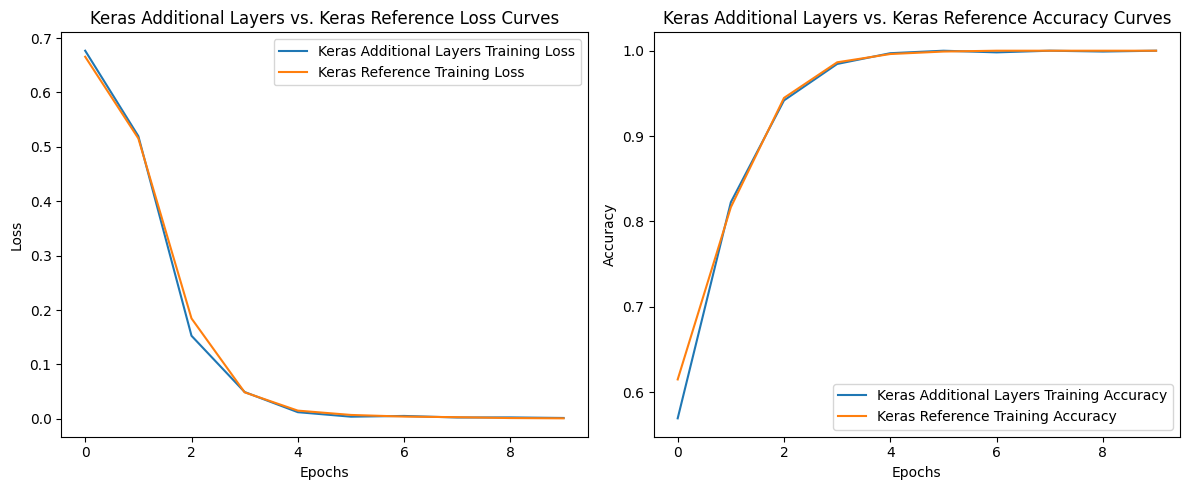

Loss Difference:
 0    0.035503
1    0.044655
2    0.004229
3    0.007740
4    0.010833
5    0.012783
6    0.012560
7    0.004871
8    0.003063
9    0.007878
Name: val_loss, dtype: float64
Max Loss Difference: 0.044655069708824185
Accuracy Difference:
 0    0.077519
1    0.046512
2    0.007752
3    0.000000
4    0.007752
5    0.000000
6    0.007752
7    0.000000
8    0.000000
9    0.000000
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.07751935720443726


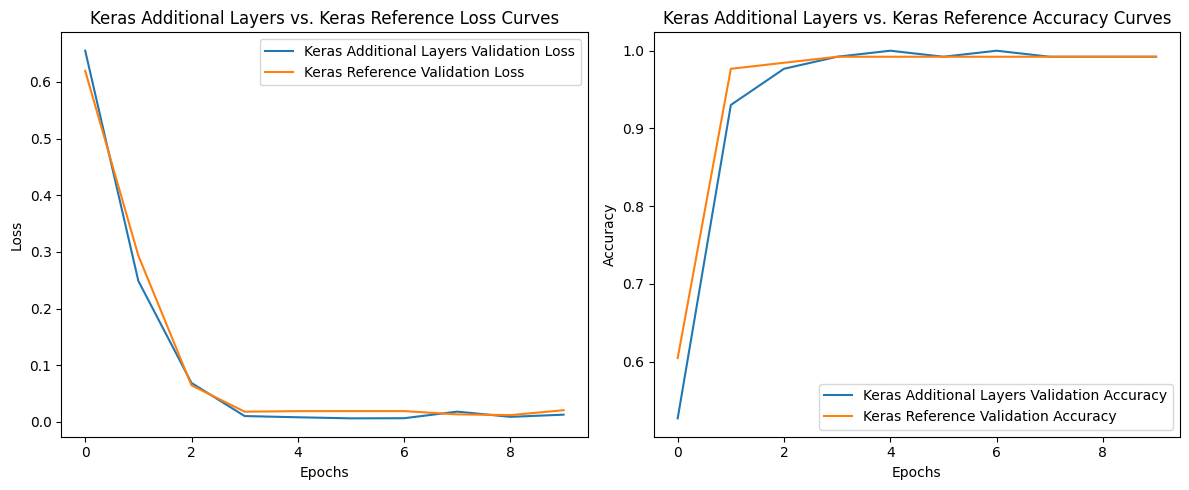

In [ ]:
full_model_comparison("Keras Additional Layers", keras_additional_conv_history, "Keras Reference", model_reference_history)

Image Transforms

Loss Difference:
 0    0.020431
1    0.132456
2    0.434030
3    0.426806
4    0.262099
5    0.125684
6    0.060585
7    0.037747
8    0.030631
9    0.020439
Name: loss, dtype: float64
Max Loss Difference: 0.43402986228466034
Accuracy Difference:
 0    0.070805
1    0.175558
2    0.276431
3    0.244423
4    0.102813
5    0.040737
6    0.020369
7    0.011639
8    0.008729
9    0.006790
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.2764306664466858


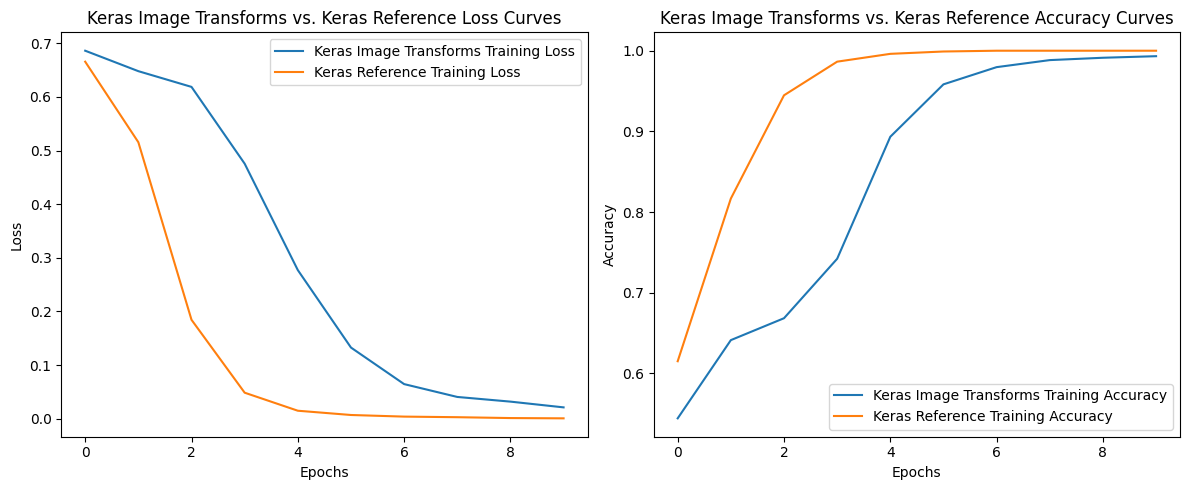

Loss Difference:
 0    0.057986
1    0.437565
2    0.500568
3    0.397443
4    0.135373
5    0.033525
6    0.007675
7    0.006883
8    0.018480
9    0.002391
Name: val_loss, dtype: float64
Max Loss Difference: 0.5005678758025169
Accuracy Difference:
 0    0.077519
1    0.503876
2    0.193798
3    0.108527
4    0.031008
5    0.007752
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.5038759708404541


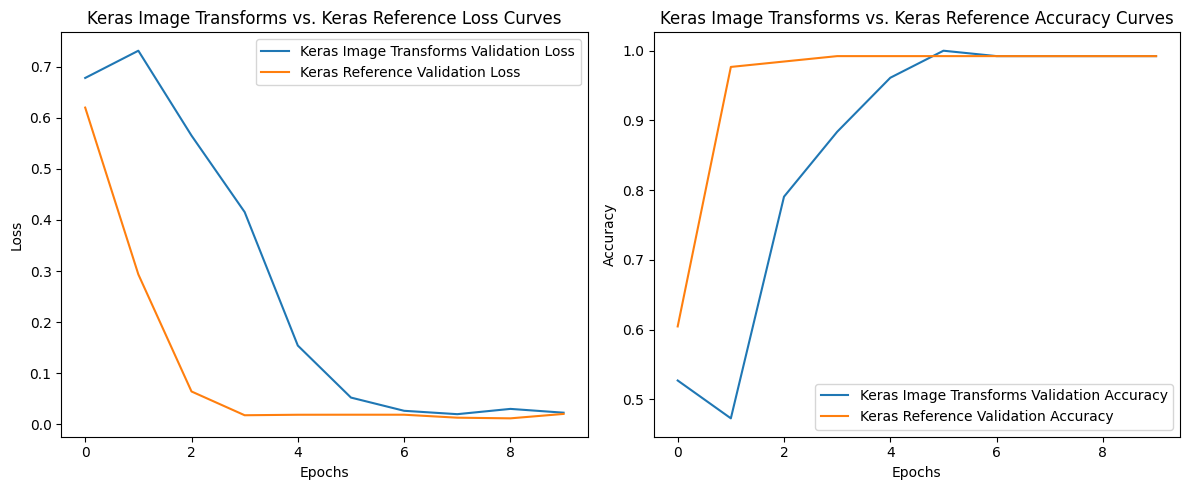

In [ ]:
full_model_comparison("Keras Image Transforms", keras_imageTransforms_history, "Keras Reference", model_reference_history)

##### Optimizations vs. Baseline (PyTorch)

Table

In [ ]:
PyTorch_FinalResults = [df.tail(1) for df in [pytorch_conversion_history, pyTorch_10x_LR_history, pyTorch_100x_LR_history, pyTorch_additional_conv_history, pyTorch_imageTransforms_history]]
PyTorch_FinalResults = pd.concat(PyTorch_FinalResults, ignore_index=True)
PyTorch_FinalResults['Model'] = ['PyTorch Conversion', 'PyTorch 10x Learning Rate', 'PyTorch 100x Learning Rate', 'PyTorch Additional Layers', 'PyTorch Image Transforms']
PyTorch_FinalResults

Unnamed: 0  accuracy      loss  val_accuracy  val_loss  \
0           9  1.000000  0.003613      1.000000  0.003434   
1           9  0.997090  0.010666      0.992248  0.006624   
2           9  0.980601  0.052932      0.992248  0.012412   
3           9  0.996120  0.009069      0.992248  0.032373   
4           9  1.000000  0.002562      0.953488  0.172967   

                        Model  
0          PyTorch Conversion  
1   PyTorch 10x Learning Rate  
2  PyTorch 100x Learning Rate  
3   PyTorch Additional Layers  
4    PyTorch Image Transforms

10x Learning Rate

Loss Difference:
 0    0.005116
1    0.000173
2    0.085886
3    0.064078
4    0.031301
5    0.005760
6    0.011787
7    0.005514
8    0.003299
9    0.007053
Name: loss, dtype: float64
Max Loss Difference: 0.08588637937517729
Accuracy Difference:
 0    0.015519
1    0.008729
2    0.068865
3    0.020369
4    0.015519
5    0.003880
6    0.010669
7    0.003880
8    0.001940
9    0.002910
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.06886517943743942


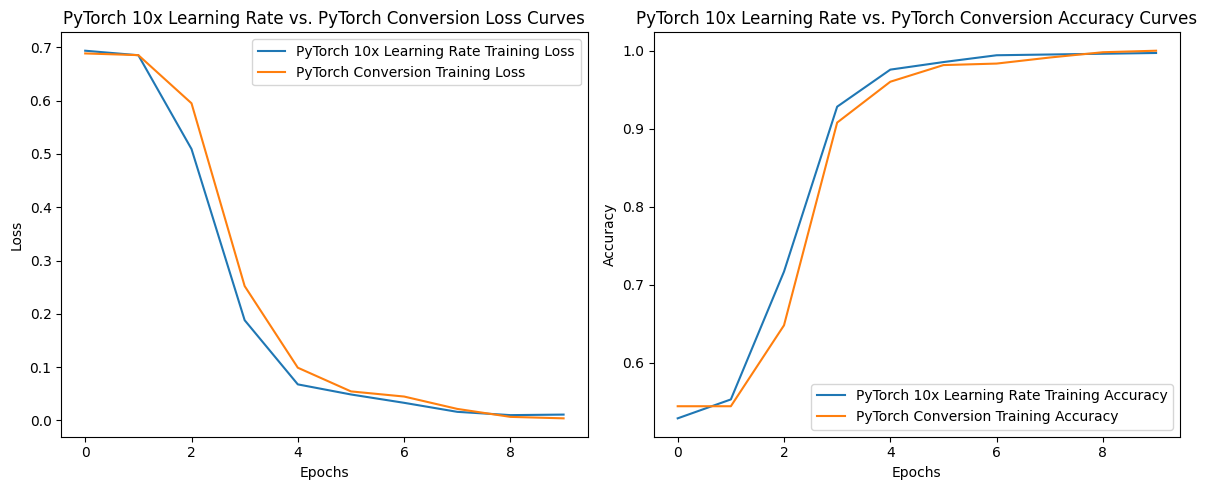

Loss Difference:
 0    0.001406
1    0.012000
2    0.195543
3    0.018612
4    0.025505
5    0.011907
6    0.023076
7    0.010832
8    0.014047
9    0.003191
Name: val_loss, dtype: float64
Max Loss Difference: 0.19554297540647297
Accuracy Difference:
 0    0.000000
1    0.007752
2    0.007752
3    0.000000
4    0.007752
5    0.007752
6    0.007752
7    0.007752
8    0.007752
9    0.007752
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.00775193798449636


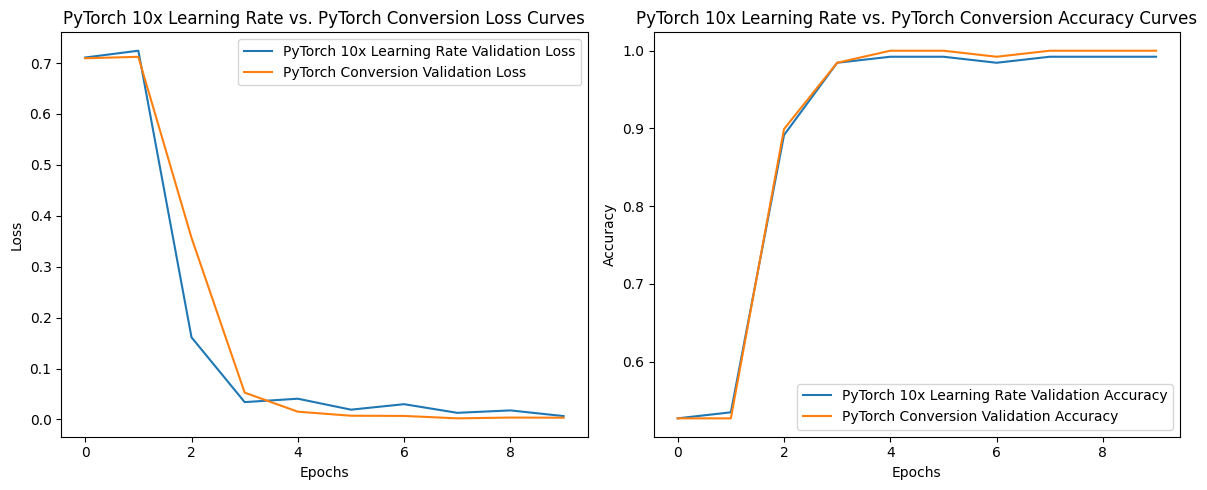

In [ ]:
full_model_comparison("PyTorch 10x Learning Rate", pyTorch_10x_LR_history, "PyTorch Conversion", pytorch_conversion_history)

100x Learning Rate

Loss Difference:
 0    283.505474
1      0.022122
2      0.080358
3      0.412417
4      0.424350
5      0.229891
6      0.139526
7      0.060969
8      0.047513
9      0.049319
Name: loss, dtype: float64
Max Loss Difference: 283.50547412563776
Accuracy Difference:
 0    0.056256
1    0.013579
2    0.079534
3    0.284190
4    0.236663
5    0.105723
6    0.064016
7    0.027158
8    0.018429
9    0.019399
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.28419010669253153


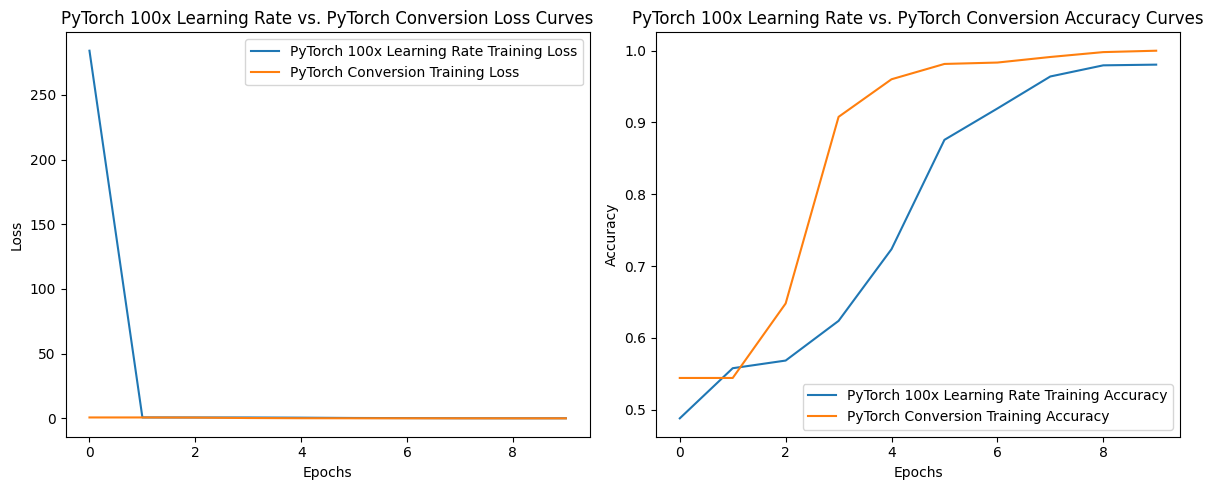

Loss Difference:
 0    0.019969
1    0.044902
2    0.342357
3    0.616169
4    0.374701
5    0.144717
6    0.078186
7    0.059554
8    0.019436
9    0.008978
Name: val_loss, dtype: float64
Max Loss Difference: 0.6161688189022243
Accuracy Difference:
 0    0.023256
1    0.000000
2    0.372093
3    0.418605
4    0.232558
5    0.085271
6    0.054264
7    0.038760
8    0.007752
9    0.007752
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.41860465116279055


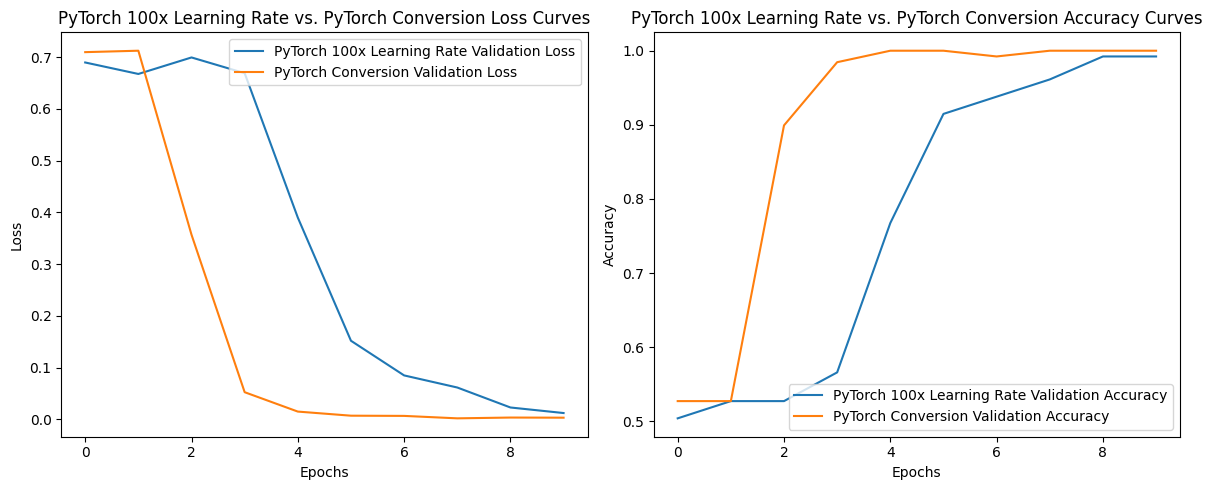

In [ ]:
full_model_comparison("PyTorch 100x Learning Rate", pyTorch_100x_LR_history, "PyTorch Conversion", pytorch_conversion_history)

Additional Layers

Loss Difference:
 0    0.002301
1    0.004392
2    0.070534
3    0.096172
4    0.126717
5    0.011156
6    0.012425
7    0.003384
8    0.014592
9    0.005456
Name: loss, dtype: float64
Max Loss Difference: 0.12671746757319752
Accuracy Difference:
 0    0.005820
1    0.000000
2    0.097963
3    0.040737
4    0.028128
5    0.000970
6    0.006790
7    0.005820
8    0.002910
9    0.003880
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.09796314258001937


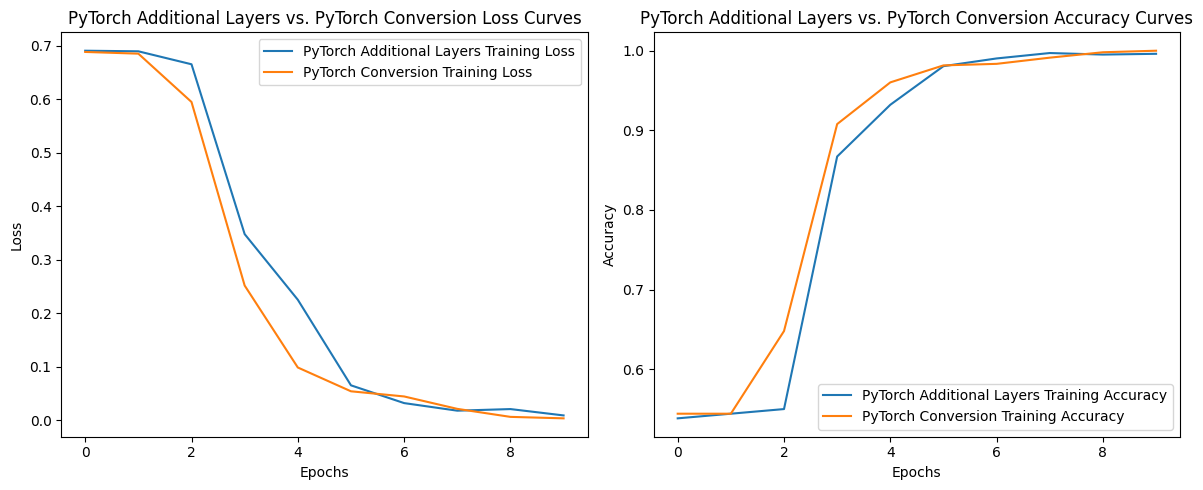

Loss Difference:
 0    0.003034
1    0.000608
2    0.271936
3    0.212392
4    0.056028
5    0.000804
6    0.006989
7    0.023280
8    0.035997
9    0.028939
Name: val_loss, dtype: float64
Max Loss Difference: 0.27193566163380944
Accuracy Difference:
 0    0.000000
1    0.000000
2    0.000000
3    0.093023
4    0.015504
5    0.000000
6    0.000000
7    0.007752
8    0.007752
9    0.007752
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.09302325581395332


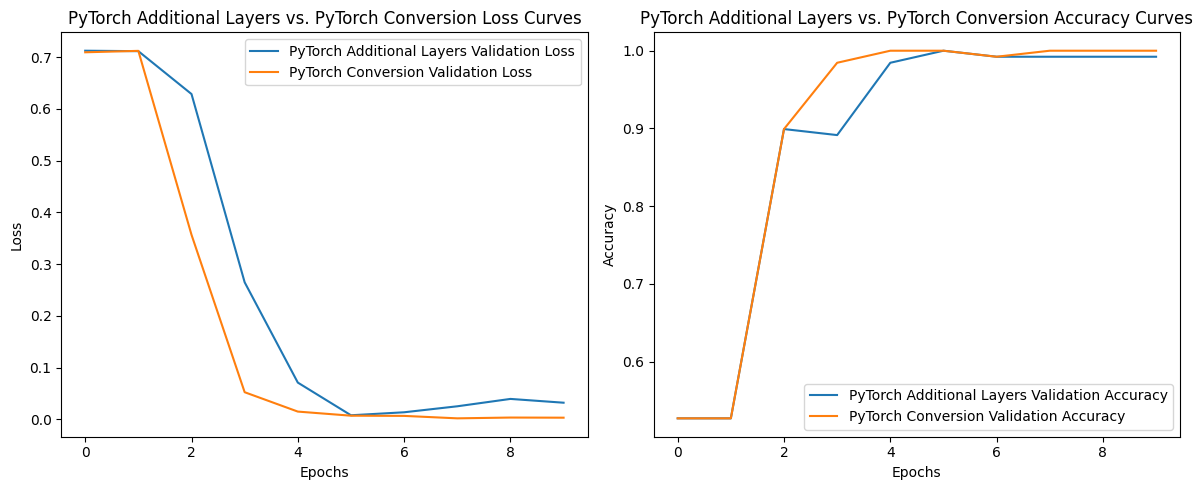

In [ ]:
full_model_comparison("PyTorch Additional Layers", pyTorch_additional_conv_history, "PyTorch Conversion", pytorch_conversion_history)

Image Transforms

Loss Difference:
 0    0.007352
1    0.183271
2    0.436258
3    0.153232
4    0.047105
5    0.031297
6    0.030917
7    0.013052
8    0.001004
9    0.001051
Name: loss, dtype: float64
Max Loss Difference: 0.4362582634477055
Accuracy Difference:
 0    0.023278
1    0.202716
2    0.292919
3    0.055286
4    0.024248
5    0.013579
6    0.013579
7    0.005820
8    0.000000
9    0.000000
Name: accuracy, dtype: float64
Max Accuracy Difference: 0.2929194956353054


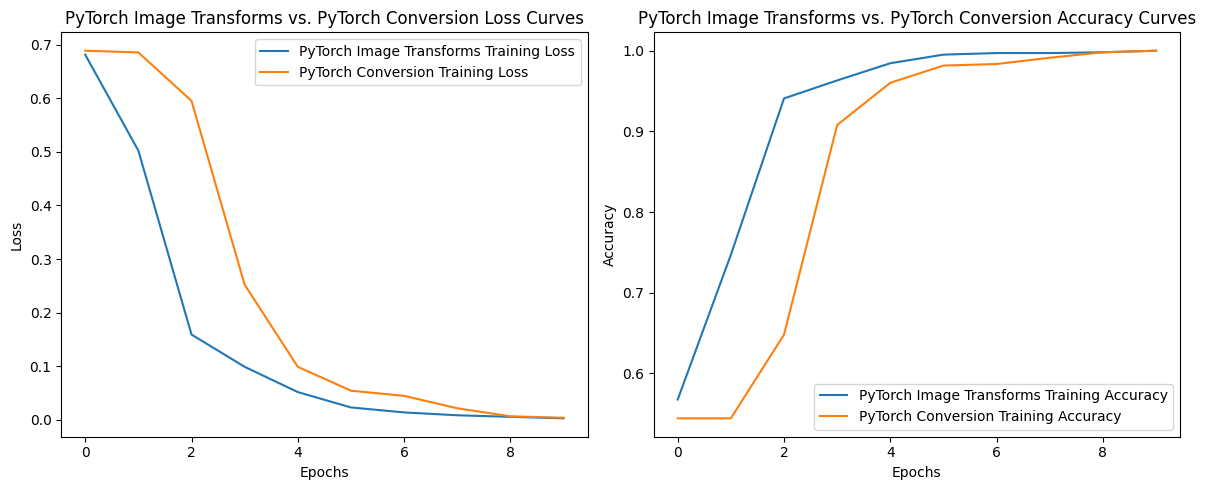

Loss Difference:
 0    0.006780
1    0.115063
2    0.129053
3    0.375280
4    0.361144
5    0.297022
6    0.220524
7    0.214826
8    0.172216
9    0.169533
Name: val_loss, dtype: float64
Max Loss Difference: 0.3752802332552771
Accuracy Difference:
 0    0.000000
1    0.310078
2    0.023256
3    0.038760
4    0.038760
5    0.046512
6    0.007752
7    0.023256
8    0.031008
9    0.046512
Name: val_accuracy, dtype: float64
Max Accuracy Difference: 0.31007751937984496


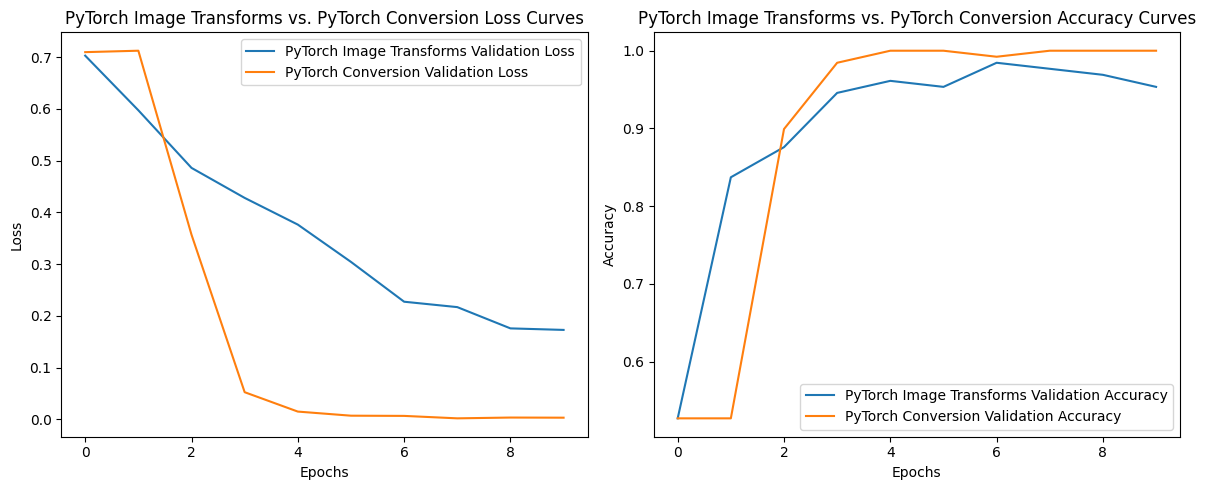

In [ ]:
full_model_comparison("PyTorch Image Transforms", pyTorch_imageTransforms_history, "PyTorch Conversion", pytorch_conversion_history)